In [ ]:
# import wandb
# from tqdm import tqdm
# import numpy as np

# api = wandb.Api()

# def load_lcbench_varying_cost_runs(data, acq):
#     runs = api.runs(path="ziv-scully-group/StoppingBayesOptEmpirical", filters={
#         "sweep": "0ajk7zy5",
#         "config.dataset_name": data,
#         "config.acquisition_function": acq},
#         )
    
#     configs_and_metrics = []
#     for run in tqdm(runs):
#         metric_keys = ["config id", "cumulative cost", "current best id", "current best observed", "StablePBGI(1e-3) acq", "StablePBGI(1e-4) acq", "StablePBGI(1e-5) acq", "LogEIPC-inv acq", "LogEIPC-exp acq", "regret upper bound", "exp min regret gap", "PRB"]
#         history = list(run.scan_history(keys = metric_keys, page_size=1_000_000_000))
#         metrics = {k: [d[k] for d in history] for k in metric_keys}
#         configs_and_metrics.append((run.config, metrics))

#     return configs_and_metrics

In [ ]:
# dataset_names = ['Fashion-MNIST', 'adult', 'higgs', 'volkert']
# acquisition_functions = {
#         "LogEIC-inv": "LogEIC-inv",
#         "LogEIC-exp": "LogEIC-exp",
#         "StablePBGI(1e-3)": "PBGI(1e-3)",
#         "StablePBGI(1e-4)": "PBGI(1e-4)", 
#         "StablePBGI(1e-5)": "PBGI(1e-5)", 
#         "LCB": "LCB",
#         "TS": "TS"
#     }

In [ ]:
# grouped_runs = {(d, a): load_lcbench_varying_cost_runs(d, a) for d in dataset_names for a in acquisition_functions}

100%|██████████| 50/50 [00:18<00:00,  2.70it/s]


In [ ]:
# import numpy as np

# metrics_per_acq = {}

# for d in dataset_names:
#     for a in acquisition_functions.keys():
#         if d not in metrics_per_acq:
#             metrics_per_acq[d] = {}
#         if acquisition_functions[a] not in metrics_per_acq[d]:
#             metrics_per_acq[d][acquisition_functions[a]] = {}

#         config_and_metrics_per_seed = grouped_runs[(d, a)]

#         # Extract metrics along with the seeds for sorting
#         seeds_and_metrics = [
#             (
#                 config['seed'],
#                 m['cumulative cost'],
#                 m['config id'],
#                 m['current best id'],
#                 m['current best observed'],
#                 m['StablePBGI(1e-3) acq'],
#                 m['StablePBGI(1e-4) acq'],
#                 m['StablePBGI(1e-5) acq'],
#                 m['LogEIC-inv acq'],
#                 m['LogEIC-exp acq'],
#                 m['exp min regret gap'],
#                 m['regret upper bound'],
#                 m['PRB']
#             )
#             for config, m in config_and_metrics_per_seed
#             if len(m['current best observed']) > 0
#         ]

#         # Sort by seed
#         seeds_and_metrics.sort(key=lambda x: x[0])

#         # Extract sorted metrics
#         metric_keys = [
#             "cumulative cost",
#             "config id",
#             "current best id",
#             "current best observed",
#             "PBGI(1e-3) acq",
#             "PBGI(1e-4) acq",
#             "PBGI(1e-5) acq",
#             "LogEIC-inv acq",
#             "LogEIC-exp acq",
#             "exp min regret gap",
#             "regret upper bound",
#             "PRB"
#         ]

#         arrays = [
#             np.array([item[i + 1] for item in seeds_and_metrics], dtype=int if "id" in key else float)
#             for i, key in enumerate(metric_keys)
#         ]

#         print(d, a, arrays[1].shape)  # config_id is arrays[1]

#         for key, array in zip(metric_keys, arrays):
#             metrics_per_acq[d][acquisition_functions[a]][key] = array

Fashion-MNIST LogEIC-inv (50, 201)
Fashion-MNIST LogEIC-exp (50, 201)
Fashion-MNIST StablePBGI(1e-3) (50, 201)
Fashion-MNIST StablePBGI(1e-4) (50, 201)
Fashion-MNIST StablePBGI(1e-5) (50, 201)
Fashion-MNIST LCB (50, 201)
Fashion-MNIST TS (50, 201)
adult LogEIC-inv (50, 201)
adult LogEIC-exp (50, 201)
adult StablePBGI(1e-3) (50, 201)
adult StablePBGI(1e-4) (50, 201)
adult StablePBGI(1e-5) (50, 201)
adult LCB (50, 201)
adult TS (50, 201)
higgs LogEIC-inv (50, 201)
higgs LogEIC-exp (50, 201)
higgs StablePBGI(1e-3) (50, 201)
higgs StablePBGI(1e-4) (50, 201)
higgs StablePBGI(1e-5) (50, 201)
higgs LCB (50, 201)
higgs TS (50, 201)
volkert LogEIC-inv (50, 201)
volkert LogEIC-exp (50, 201)
volkert StablePBGI(1e-3) (50, 201)
volkert StablePBGI(1e-4) (50, 201)
volkert StablePBGI(1e-5) (50, 201)
volkert LCB (50, 201)
volkert TS (50, 201)


In [ ]:
# import os
# import importlib.util

# root_dir = os.path.abspath("..")
# api_path = os.path.join(root_dir, "LCBench", "api.py")
# spec = importlib.util.spec_from_file_location("LCBench.api", api_path)
# api = importlib.util.module_from_spec(spec)
# spec.loader.exec_module(api)

# Benchmark = api.Benchmark

In [ ]:
# os.makedirs("../LCBench/cached", exist_ok=True)
# bench_dir = "../LCBench/cached/six_datasets_lw.json"
# bench = Benchmark(bench_dir, cache=False)

==> Loading data...
==> No cached data found or cache set to False.
==> Reading json data...
==> Done.


In [ ]:
# import numpy as np

# # Loop over each dataset and acquisition function.
# for d in dataset_names:
#     for a in acquisition_functions.values():
#         # Access current best IDs from the unified structure
#         best_ids = metrics_per_acq[d][a]["current best id"]
#         n_seeds, n_iterations = best_ids.shape
        
#         # Prepare arrays to store the test metrics
#         test_error_mat = np.empty((n_seeds, n_iterations))
        
#         # Use the best configuration IDs to query test metrics
#         for s in range(n_seeds):
#             for i in range(n_iterations):
#                 config_id = best_ids[s, i]
#                 test_error_mat[s, i] = 100-bench.query(d, "final_test_accuracy", config_id)
        
#         # Store in unified structure
#         metrics_per_acq[d][a]["final test error"] = test_error_mat

In [ ]:
# import dill

# with open("empirical_results/lcbench_unknown_cost_metrics_per_acq.pkl", "wb") as f:
#     dill.dump(metrics_per_acq, f)

In [ ]:
# from collections import defaultdict

# acq_key_map = {
#     "LogEIC-inv": "LogEIPC-inv",
#     "LogEIC-exp": "LogEIPC-exp"
# }
# metric_map = {
#     "LogEIC-inv acq": "LogEIPC-inv acq",
#     "LogEIC-exp acq": "LogEIPC-exp acq"
# }

# new_metrics_per_acq = defaultdict(lambda: defaultdict(dict))

# for d, acq_dict in metrics_per_acq.items():
#     for acq_key, metric_dict in acq_dict.items():
#         new_acq_key = acq_key_map.get(acq_key, acq_key)
#         for metric, value in metric_dict.items():
#             new_metric = metric_map.get(metric, metric)
#             new_metrics_per_acq[d][new_acq_key][new_metric] = value

# metrics_per_acq = new_metrics_per_acq

In [1]:
import dill
with open("empirical_results/lcbench_unknown_cost_metrics_per_acq.pkl", "rb") as f:
    metrics_per_acq = dill.load(f)

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

In [3]:
best_acc_per_dataset = {
    'Fashion-MNIST': 90.17316017316017,
    'adult': 83.00552211950115,
    'higgs': 71.86302385956238,
    'volkert': 62.765681026866915
}

In [4]:
import numpy as np

# === Config ===
dataset_names = ['Fashion-MNIST', 'adult', 'higgs', 'volkert']
lambdas       = [1e-3, 1e-4, 1e-5]
acq_order     = ['LogEIPC-inv', 'PBGI', 'LCB', 'TS']
init          = 20

x_limit_per_dataset = {
    "Fashion-MNIST": 80000,
    "adult":         40000,
    "higgs":         40000,
    "volkert":       40000
}
cost_limit_per_dataset = {
    "Fashion-MNIST": 160000,
    "adult":         40000,
    "higgs":         80000,
    "volkert":       80000
}

# === Color and marker settings ===
color_dict = {
    'LogEIPC-inv':  'tab:blue',
    'LogEIPC-med':  'tab:blue',
    'PBGI(1e-3)':  'tab:orange',
    'PBGI(1e-4)':  'tab:orange',
    'PBGI(1e-5)':  'tab:orange',
    'LCB':         'tab:purple',
    'UCB-LCB':     'tab:purple',
    'SRGap-med':   'tab:pink',
    'TS':          'tab:brown',
    'PRB':         'tab:brown',
    'GSS':         'tab:olive',
    'Convergence': 'tab:gray',
    'Hindsight':   'tab:red'
}
marker_dict = {
    '1e-3': 's',
    '1e-4': 'o',
    '1e-5': '^'
}

# === Build stopping_rules for each λ ===
stopping_rules = []
for lam in lambdas:
    lam_str   = f"1e-{int(round(-np.log10(lam)))}"  # “1e-3”, “1e-4”, “1e-5”
    fixed_acq = f"PBGI({lam_str})"
    marker    = marker_dict[lam_str]

    templates = [
        {
            'stp_key':      'PBGI',
            'is_hindsight': False,
            'condition_fn': (lambda i, seed, d, lam=lam, fa=fixed_acq: (
                i >= init and
                metrics_per_acq[d][fa][f"{fa} acq"][seed][i] >=
                metrics_per_acq[d][fa]["current best observed"][seed][i - 1]
            ))
        },
        # {
        #     'stp_key':      'LogEIPC',
        #     'is_hindsight': False,
        #     'condition_fn': (lambda i, seed, d, lam=lam, fa=fixed_acq: (
        #         i >= init and
        #         metrics_per_acq[d][fa]["LogEIPC acq"][seed][i] <= np.log(lam)
        #     ))
        # },
        {
            'stp_key':      'LogEIPC-med',
            'is_hindsight': False,
            'condition_fn': (lambda i, seed, d, fa=fixed_acq: (
                i >= init and
                metrics_per_acq[d][fa]["LogEIPC-inv acq"][seed][i] <= (
                    np.log(0.01) +
                    np.nanmedian(metrics_per_acq[d][fa]["LogEIPC-inv acq"][seed][1:21])
                )
            ))
        },
        {
            'stp_key':      'SRGap-med',
            'is_hindsight': False,
            'condition_fn': (lambda i, seed, d, fa=fixed_acq: (
                i >= init and
                metrics_per_acq[d][fa]["exp min regret gap"][seed][i] <=
                0.1 * np.nanmedian(
                    metrics_per_acq[d][fa]["exp min regret gap"][seed][1:21]
                )
            ))
        },
        {
            'stp_key':      'UCB-LCB',
            'is_hindsight': False,
            'condition_fn': (lambda i, seed, d, fa=fixed_acq: (
                i >= init and
                metrics_per_acq[d][fa]["regret upper bound"][seed][i] <= 0.01
            ))
        },
        {
            'stp_key':      'GSS',
            'is_hindsight': False,
            'condition_fn': (lambda i, seed, d, fa=fixed_acq: (
                i >= init and (
                    (np.nanpercentile(
                        metrics_per_acq[d][fa]["current best observed"][seed][:i+1], 75
                     ) -
                     np.nanpercentile(
                        metrics_per_acq[d][fa]["current best observed"][seed][:i+1], 25
                     )) == 0
                ) or (
                    ((metrics_per_acq[d][fa]["current best observed"][seed][i - 5] -
                      metrics_per_acq[d][fa]["current best observed"][seed][i]) /
                     (np.nanpercentile(
                        metrics_per_acq[d][fa]["current best observed"][seed][:i+1], 75
                     ) -
                      np.nanpercentile(
                        metrics_per_acq[d][fa]["current best observed"][seed][:i+1], 25
                     ))
                    ) <= 0.01
                )
            ))
        },
        {
            'stp_key':      'Convergence',
            'is_hindsight': False,
            'condition_fn': (lambda i, seed, d, fa=fixed_acq: (
                i >= init and
                metrics_per_acq[d][fa]["current best observed"][seed][i] ==
                metrics_per_acq[d][fa]["current best observed"][seed][i - 5]
            ))
        },
        {
            'stp_key':      'PRB',
            'is_hindsight': False,
            'condition_fn': (lambda i, seed, d, fa=fixed_acq: (
                i >= init and
                metrics_per_acq[d][fa]["PRB"][seed][i] >= 0.95
            ))
        },
        {
            'stp_key':      'Hindsight',
            'is_hindsight': True,
            'condition_fn': None
        }
    ]

    for temp in templates:
        rule = {
            'acq_key':      fixed_acq,
            'stp_key':      temp['stp_key'],
            'is_hindsight': temp['is_hindsight'],
            'marker':       marker,
            'color':        color_dict.get(temp['stp_key'], color_dict[fixed_acq]),
            'label':        'PBGI/LogEIPC-exp' if temp['stp_key'] == 'PBGI' else temp['stp_key']
        }
        if temp['condition_fn'] is not None:
            rule['condition_fn'] = temp['condition_fn']
        stopping_rules.append(rule)

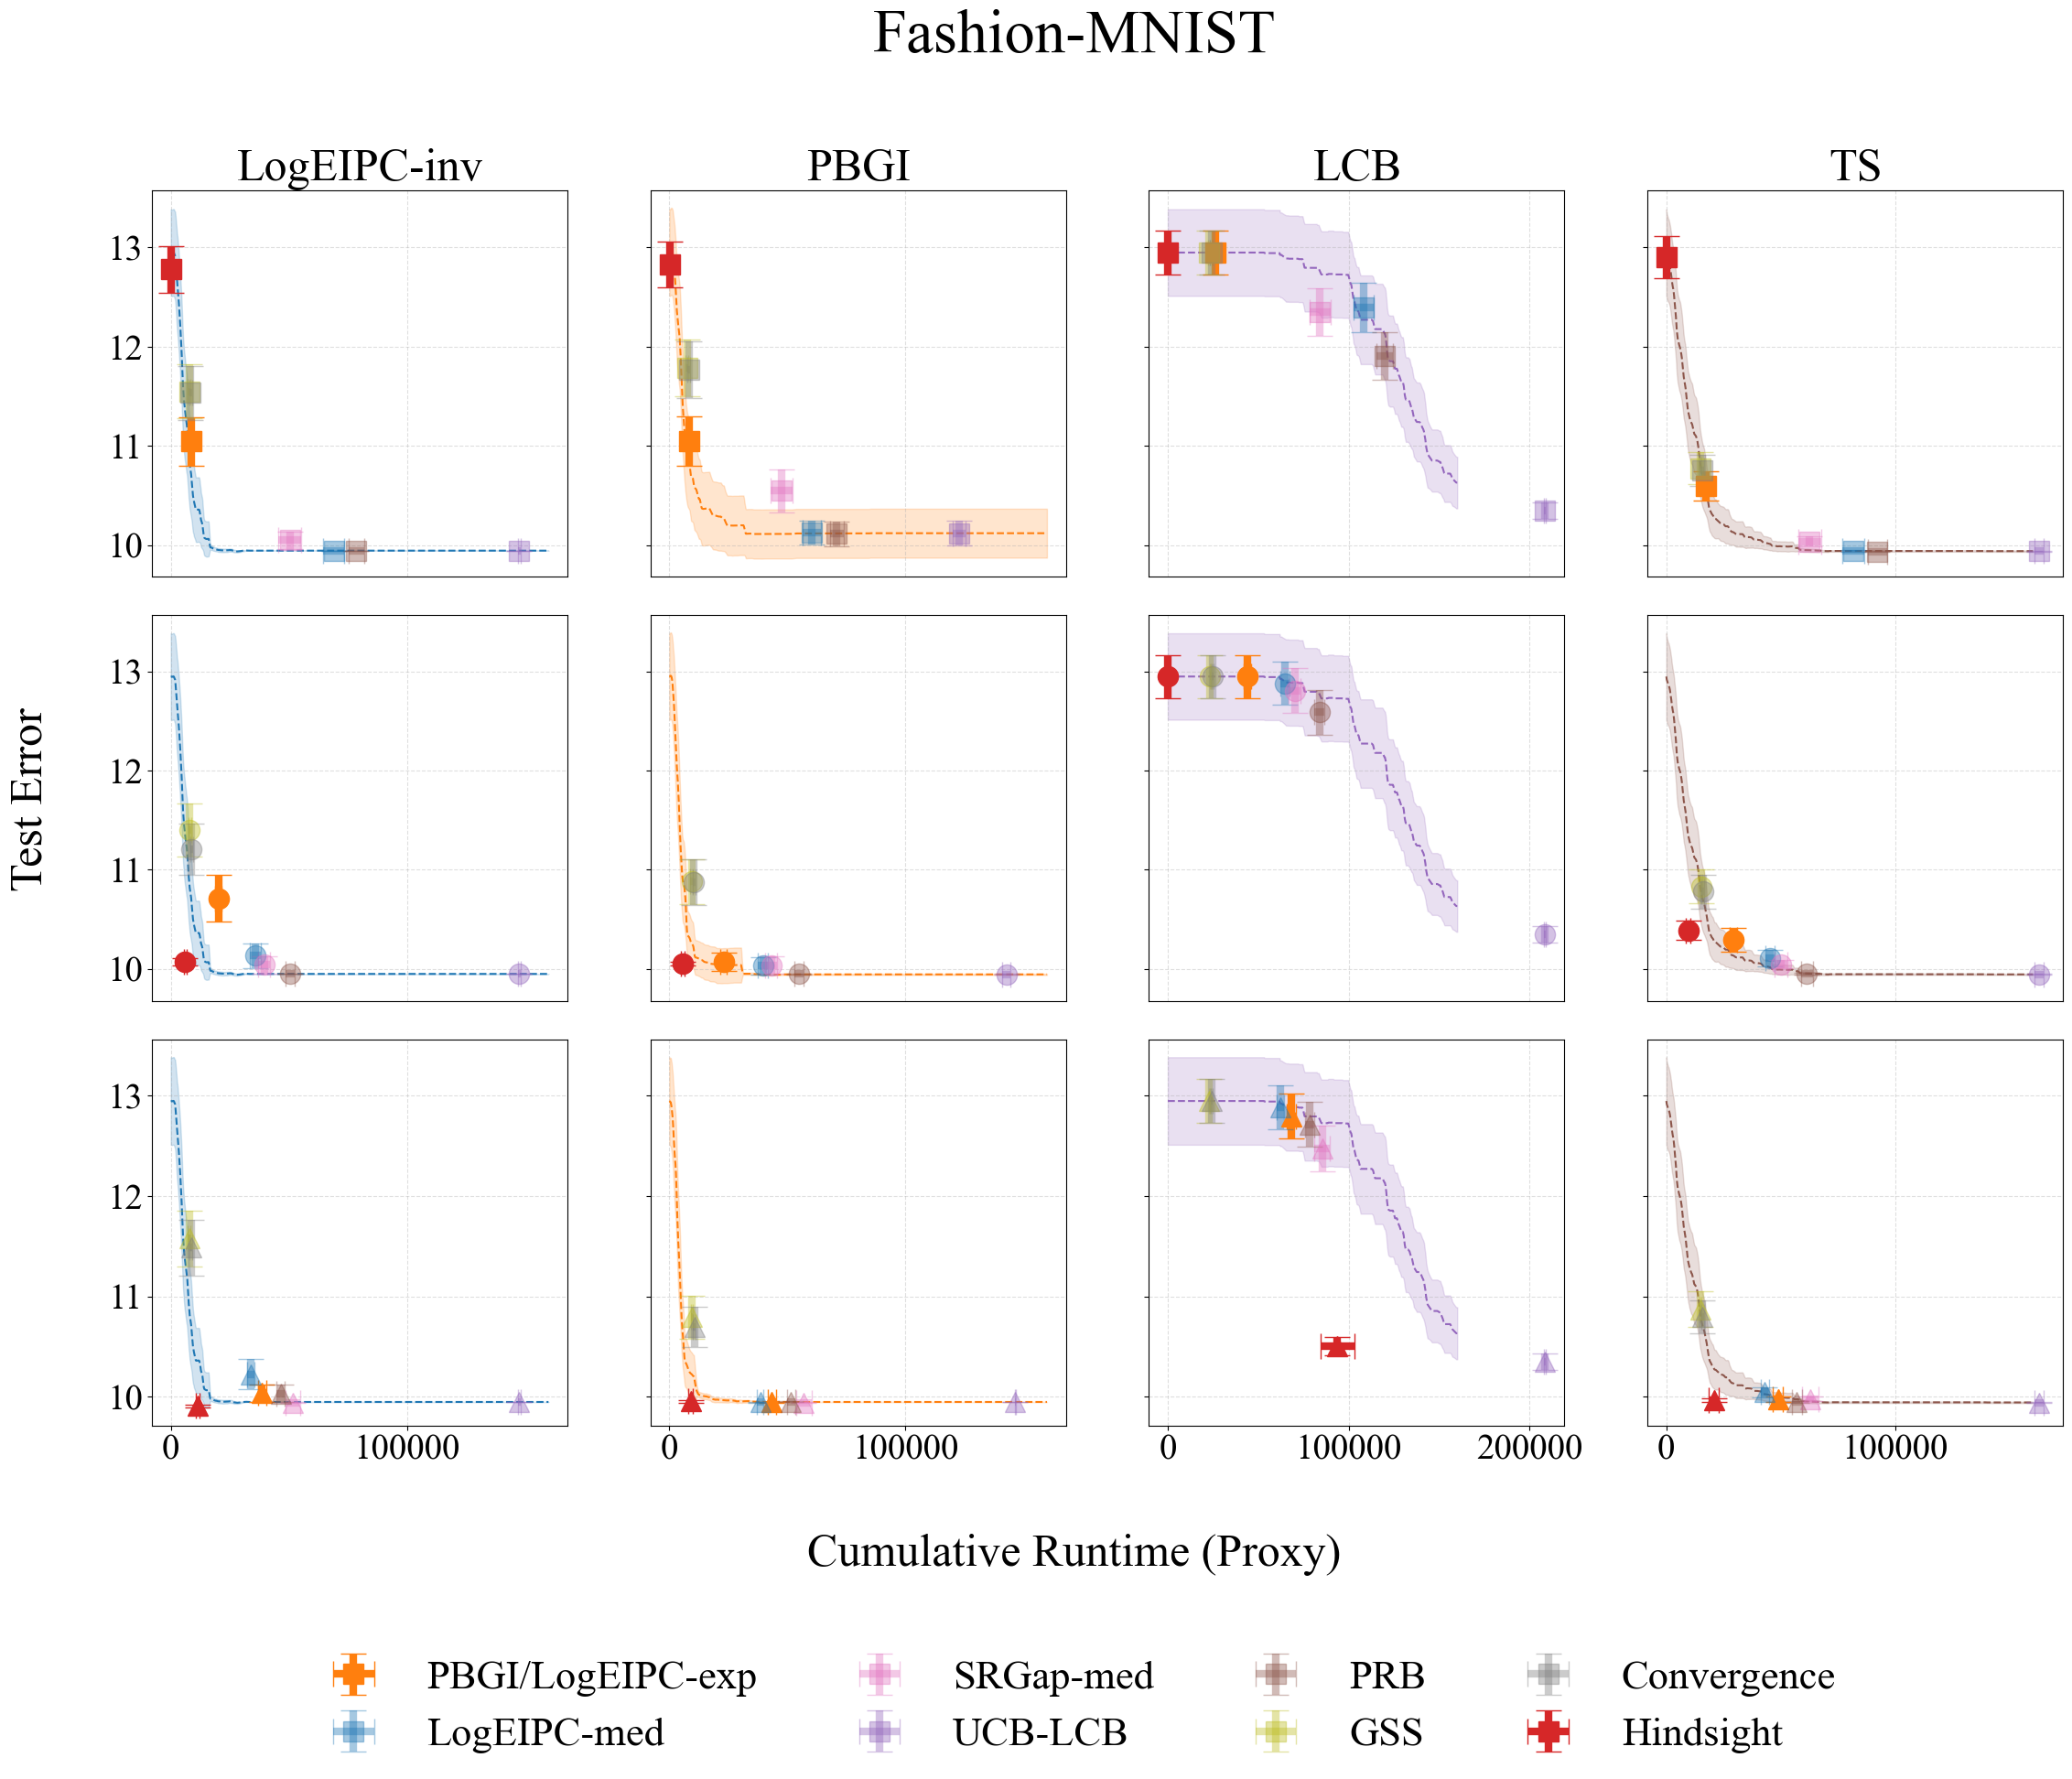

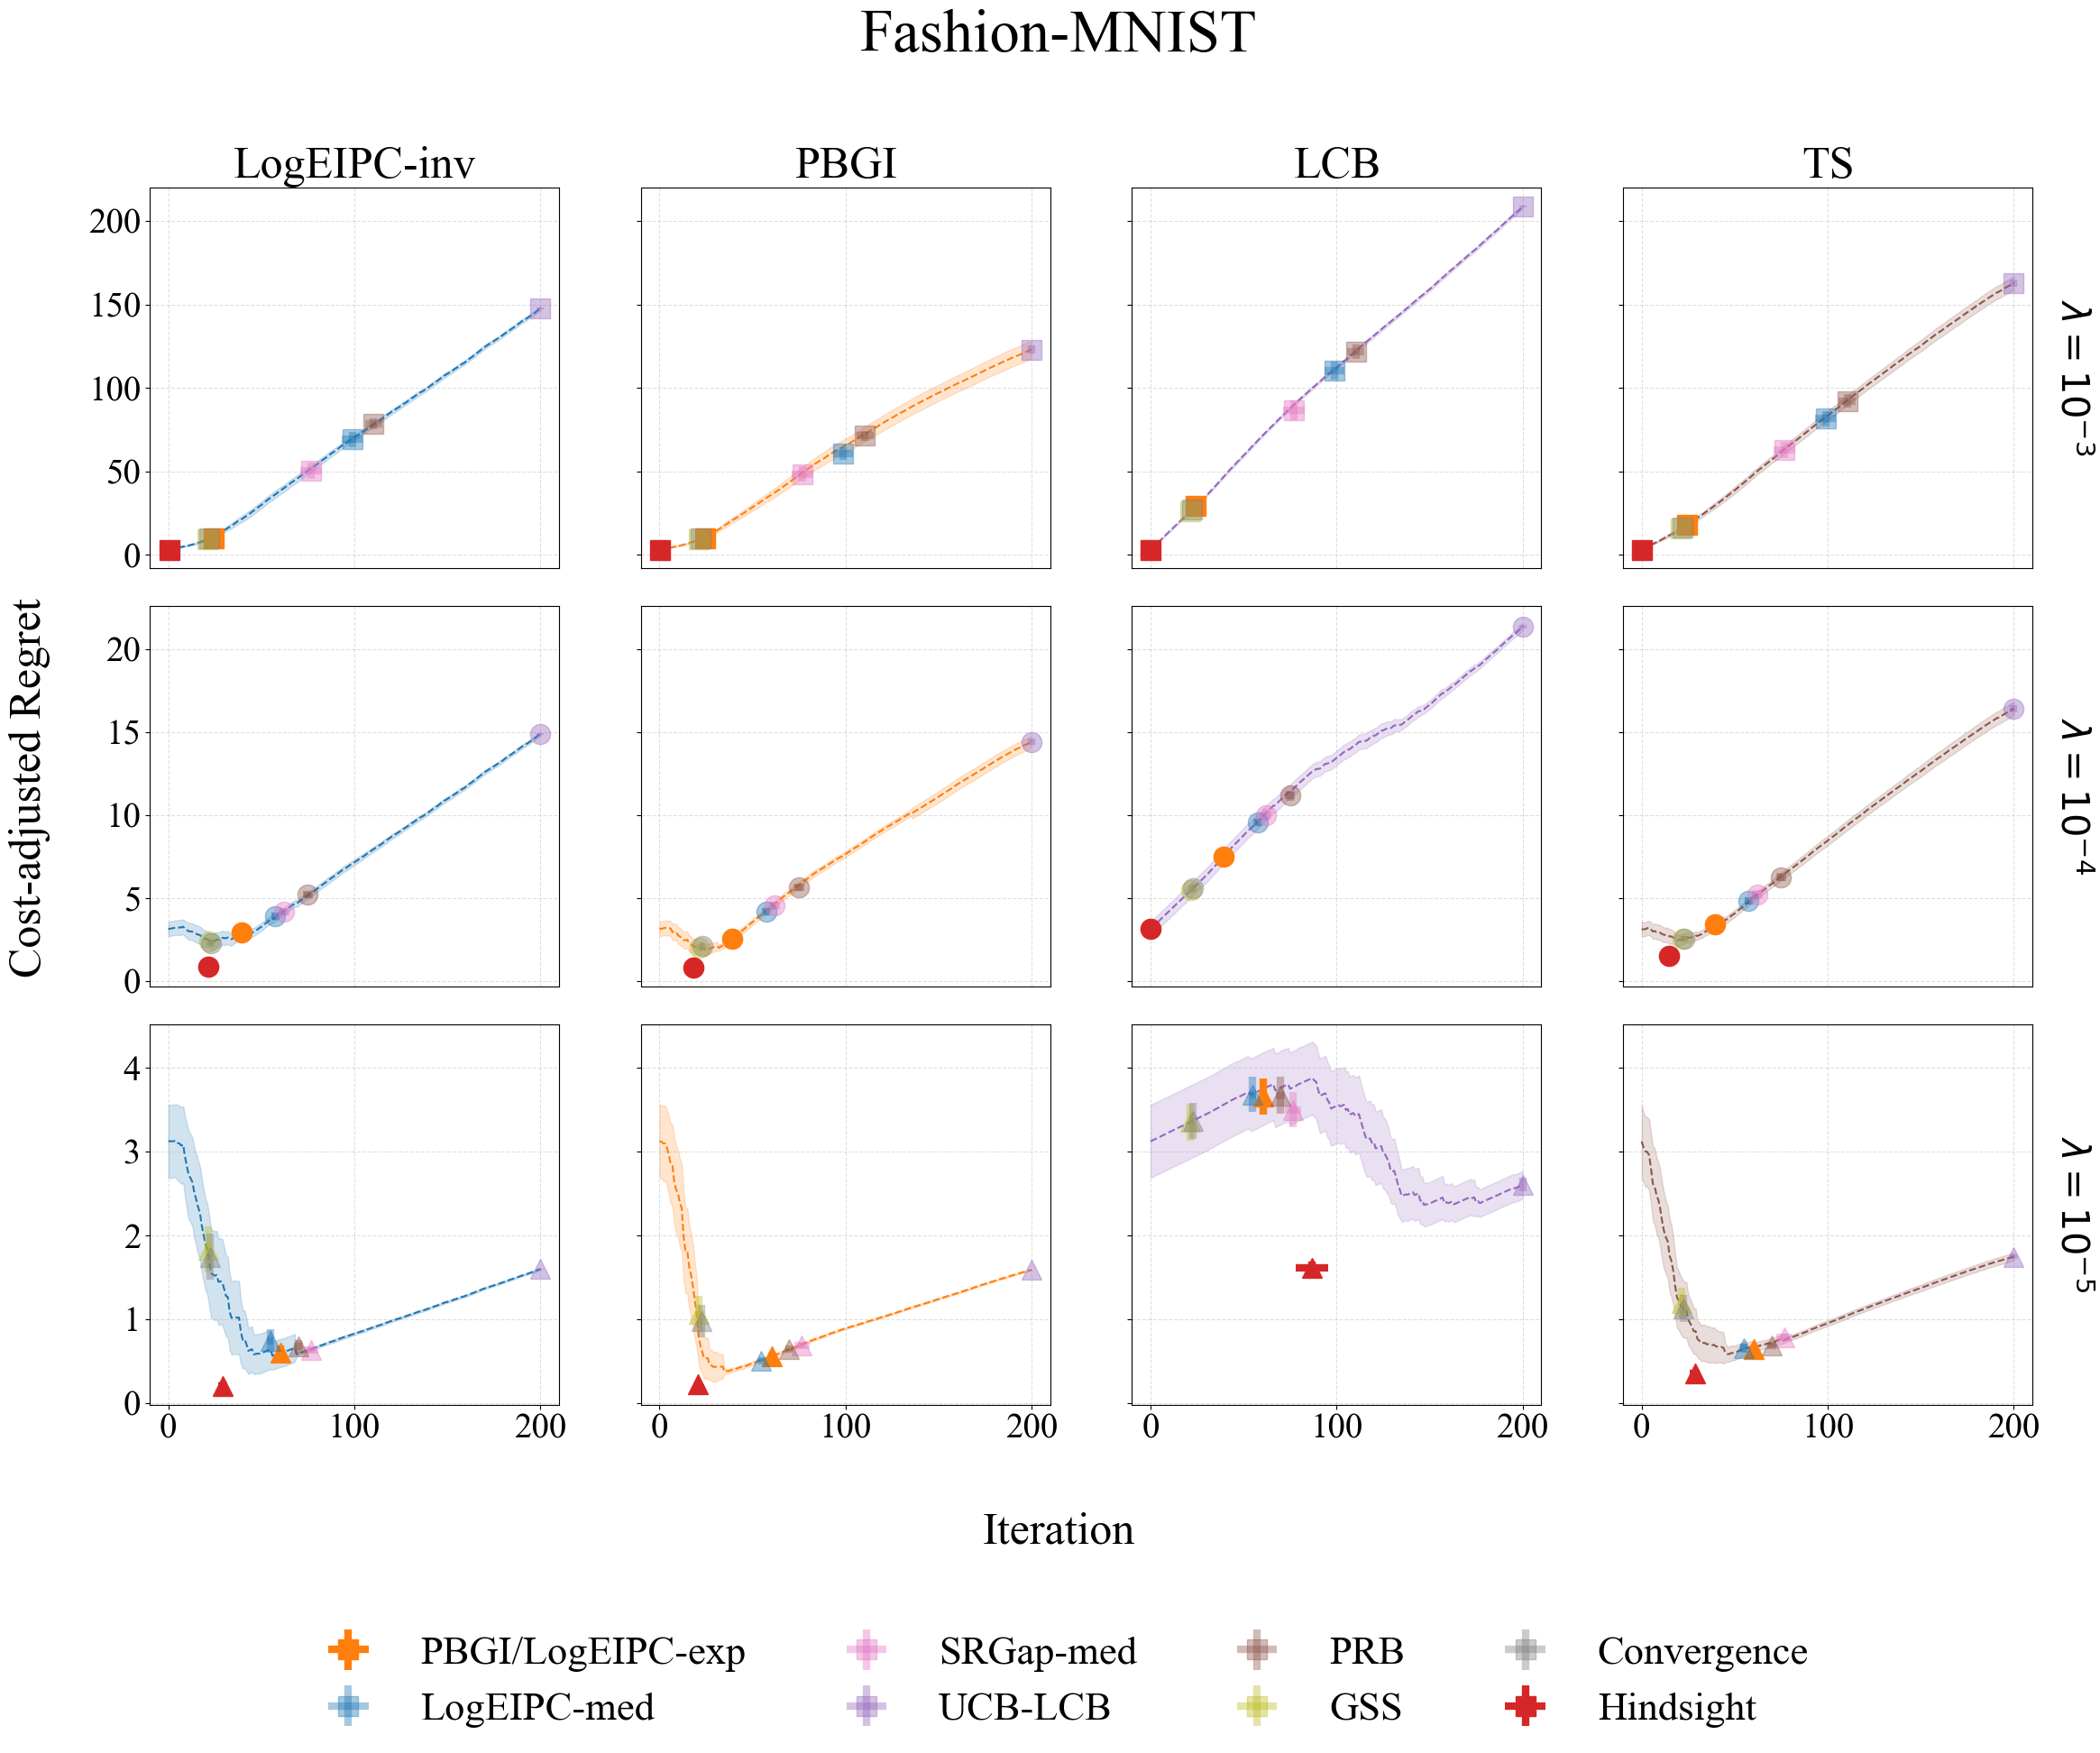

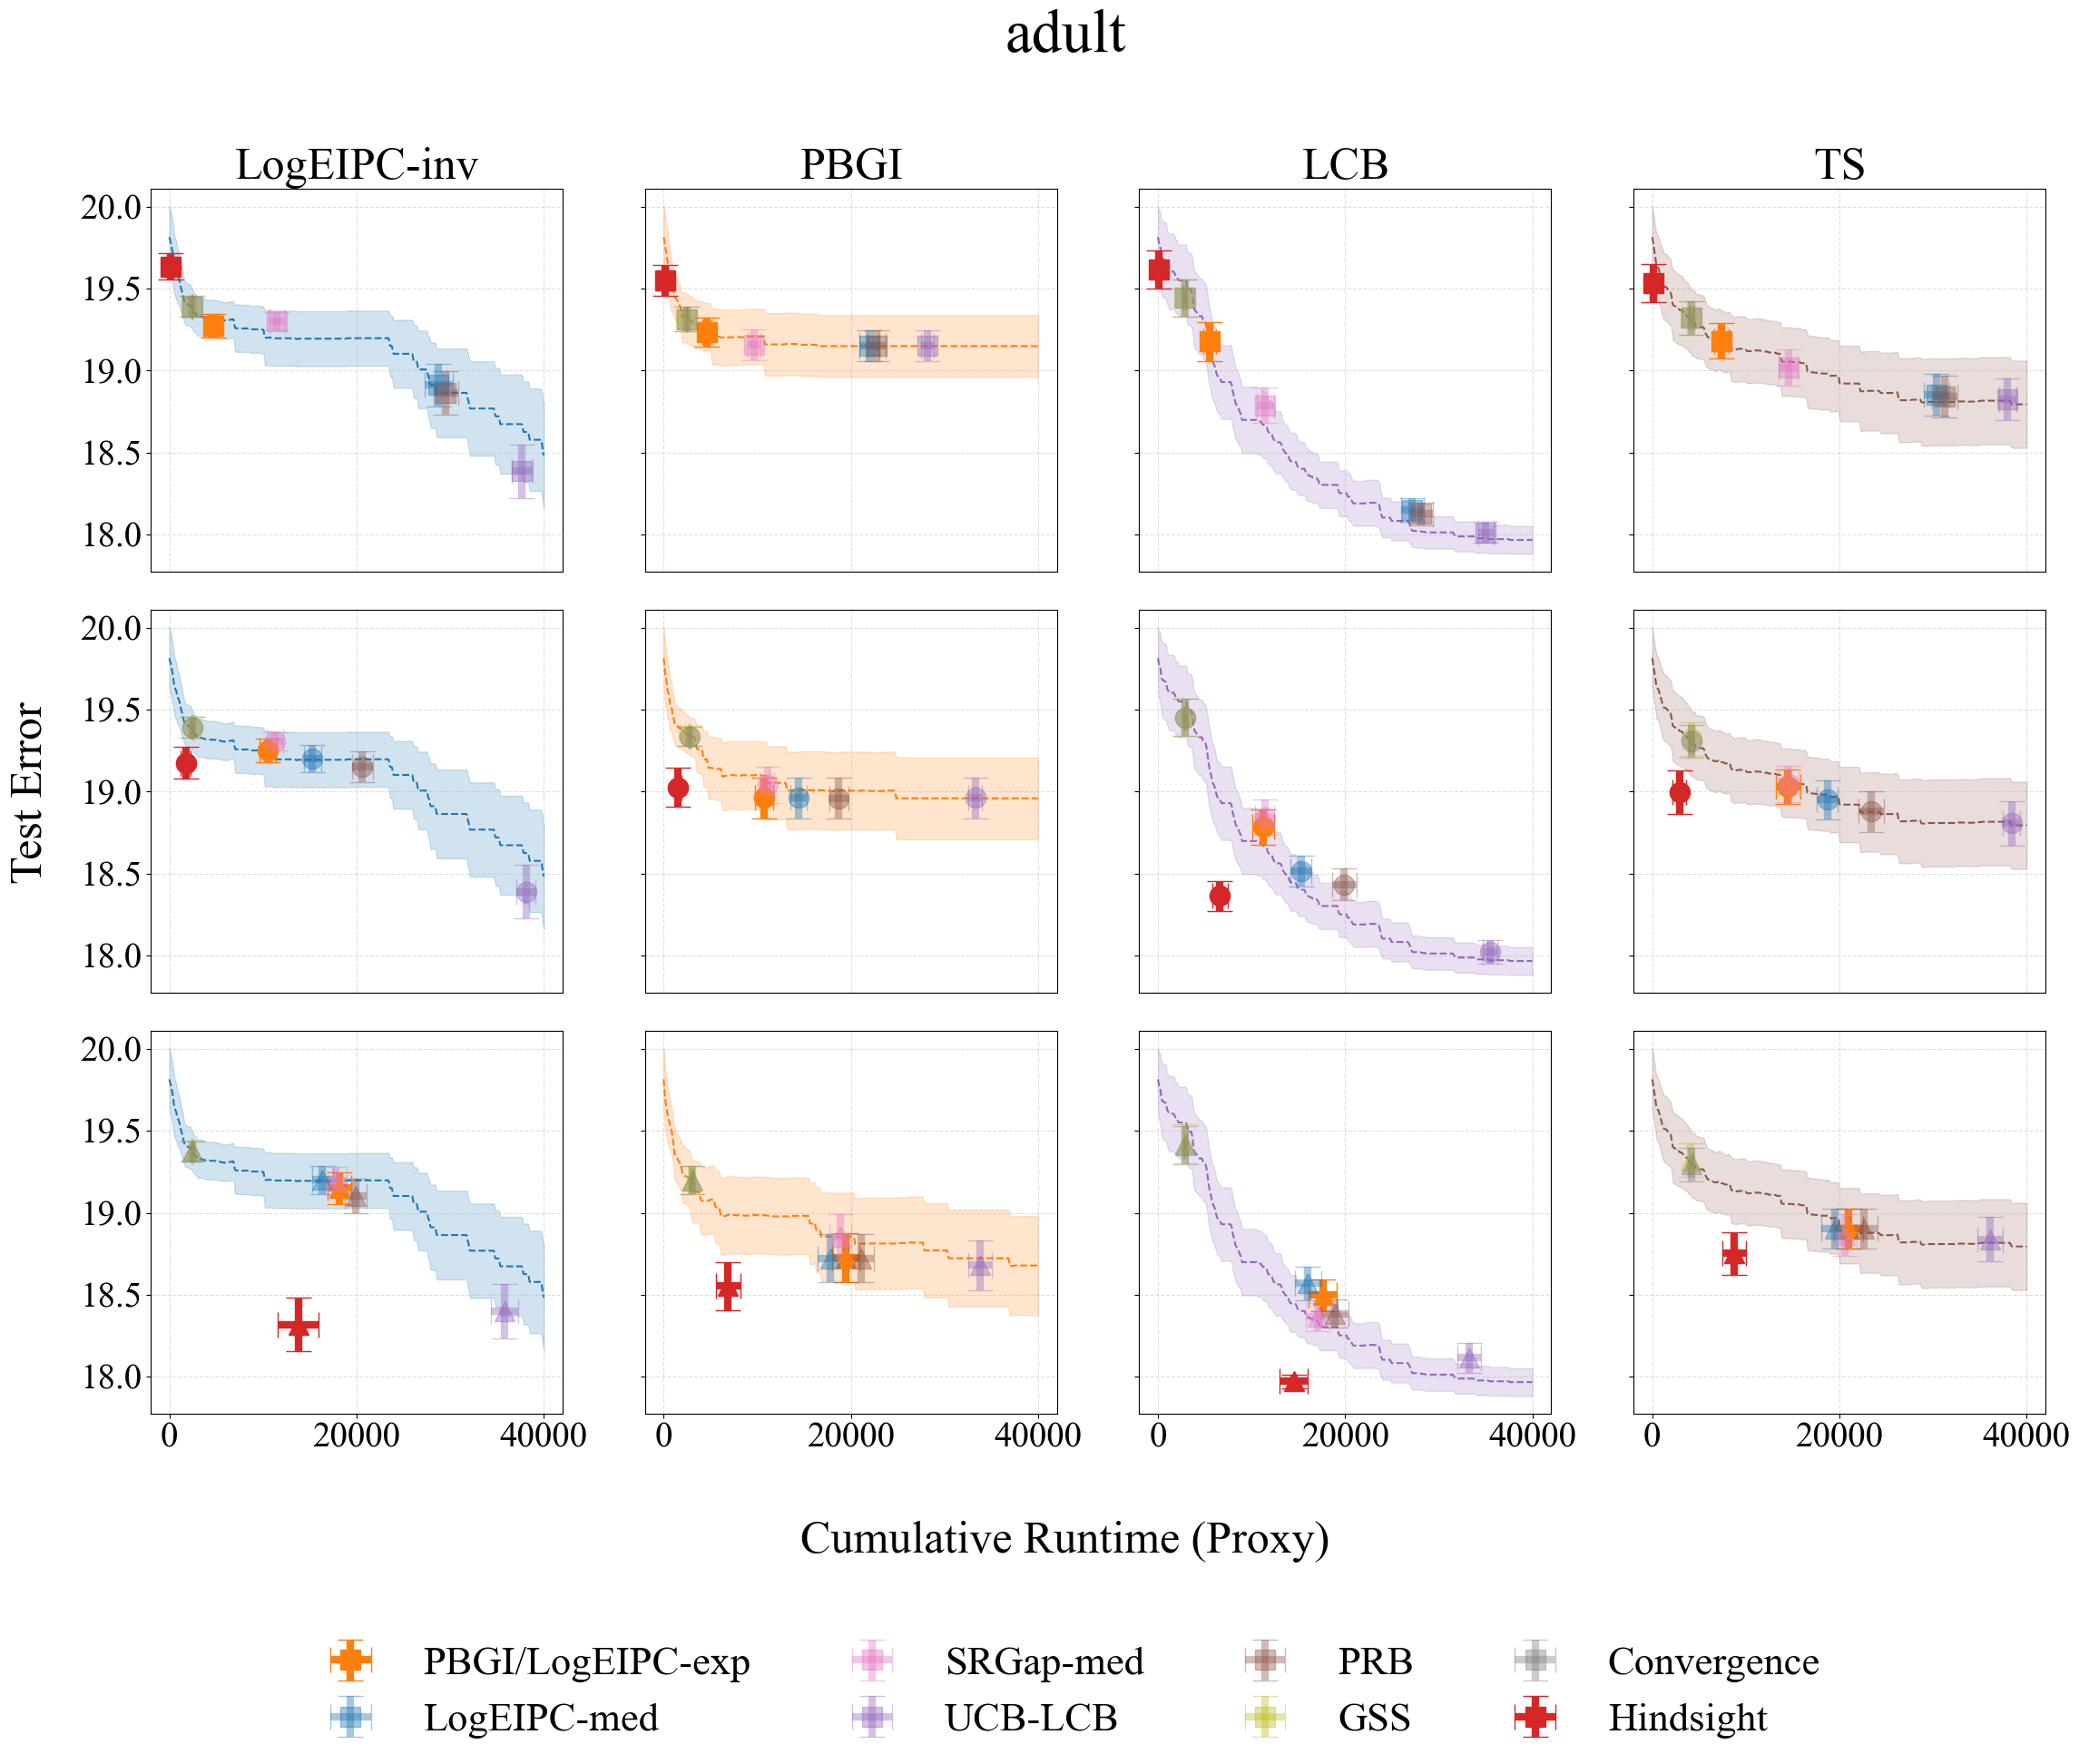

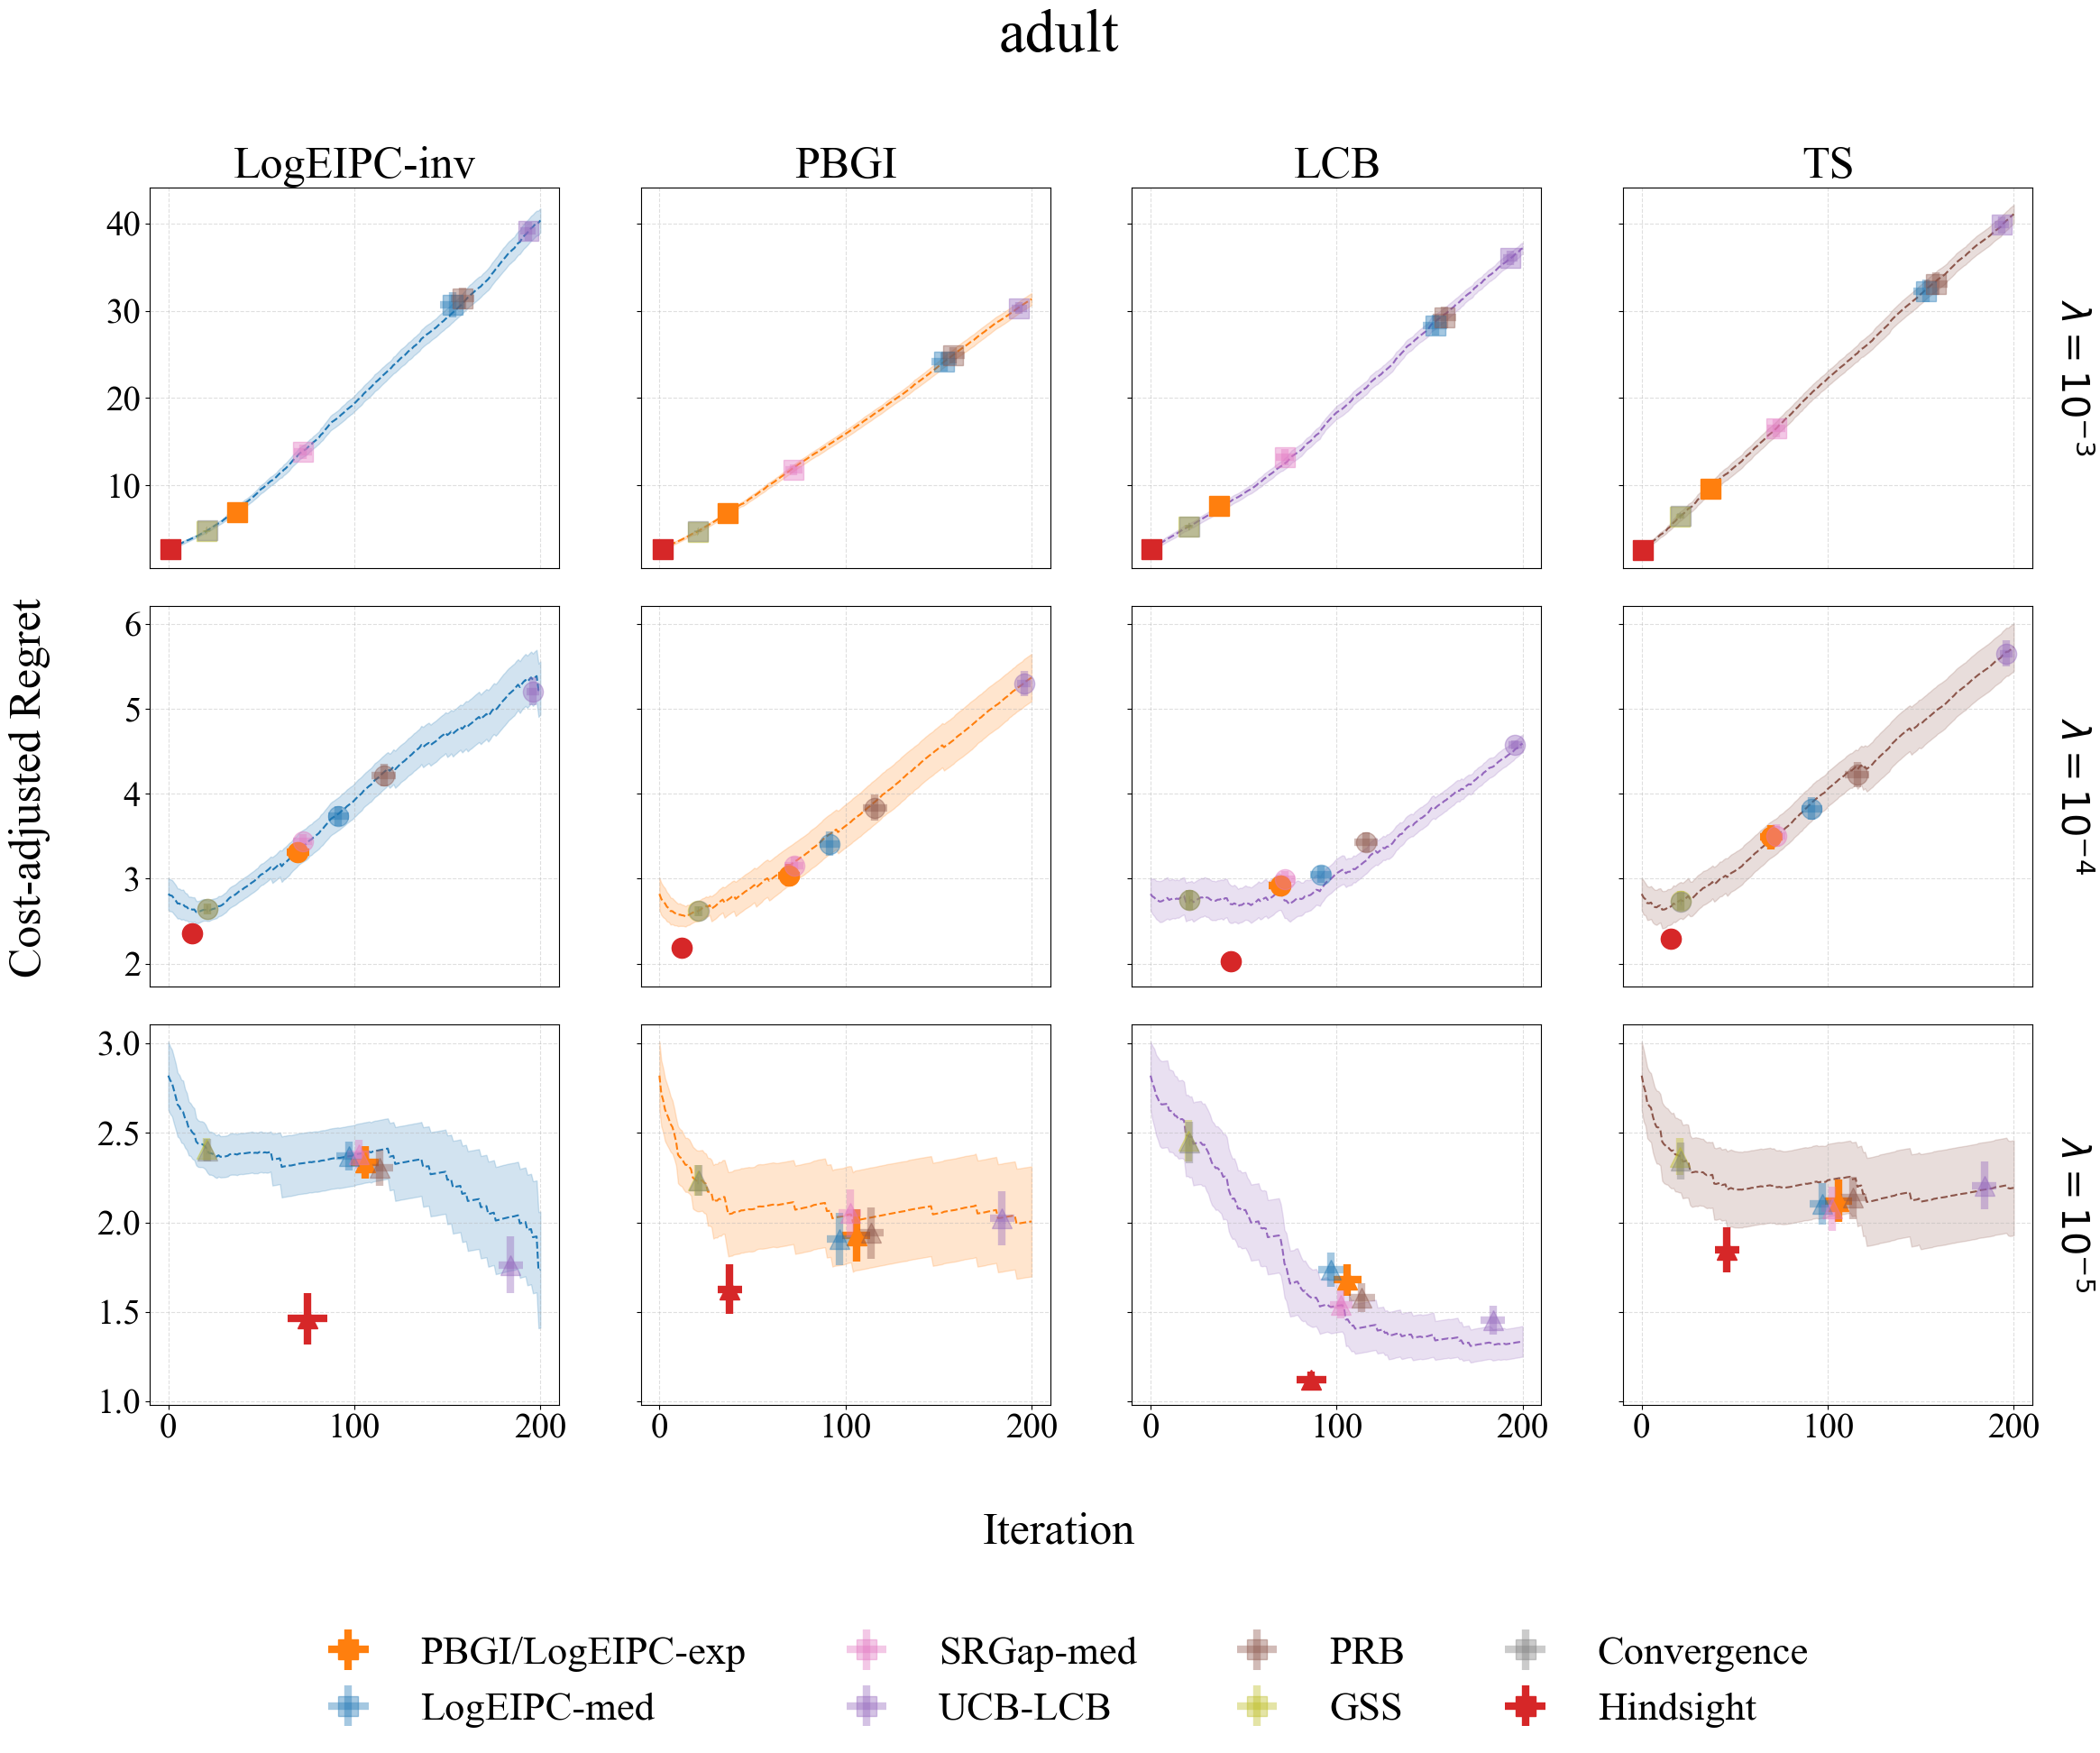

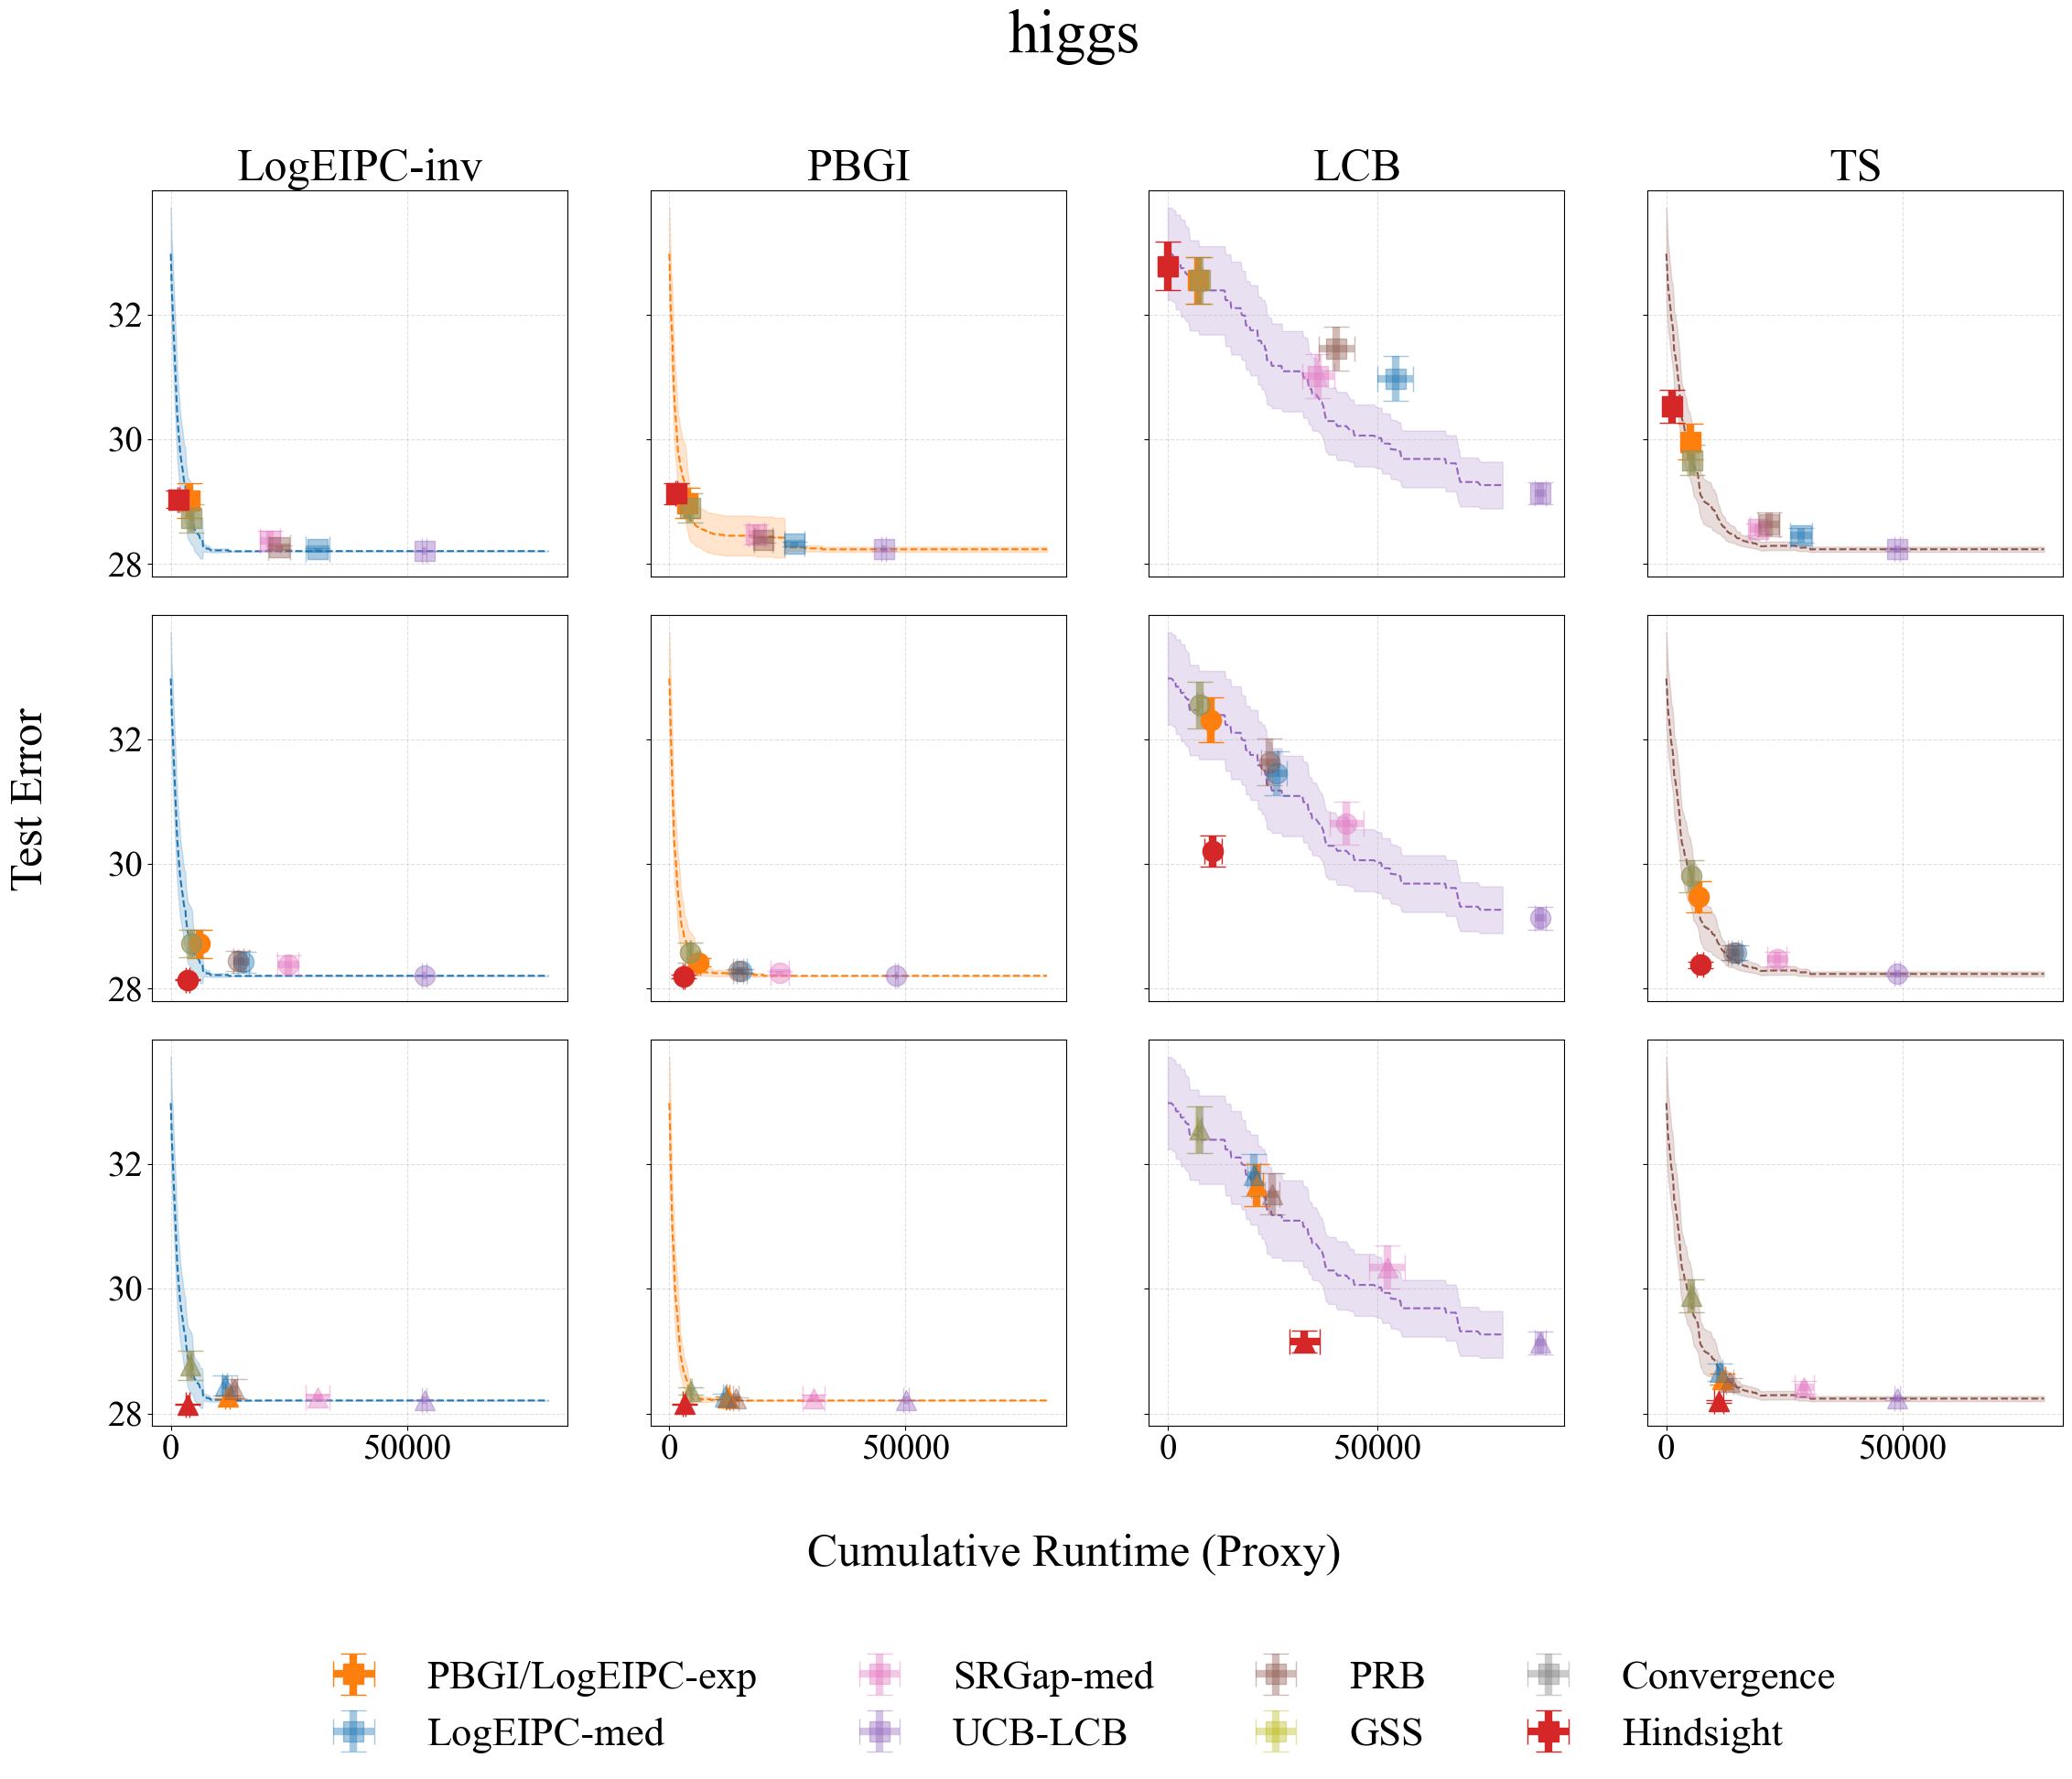

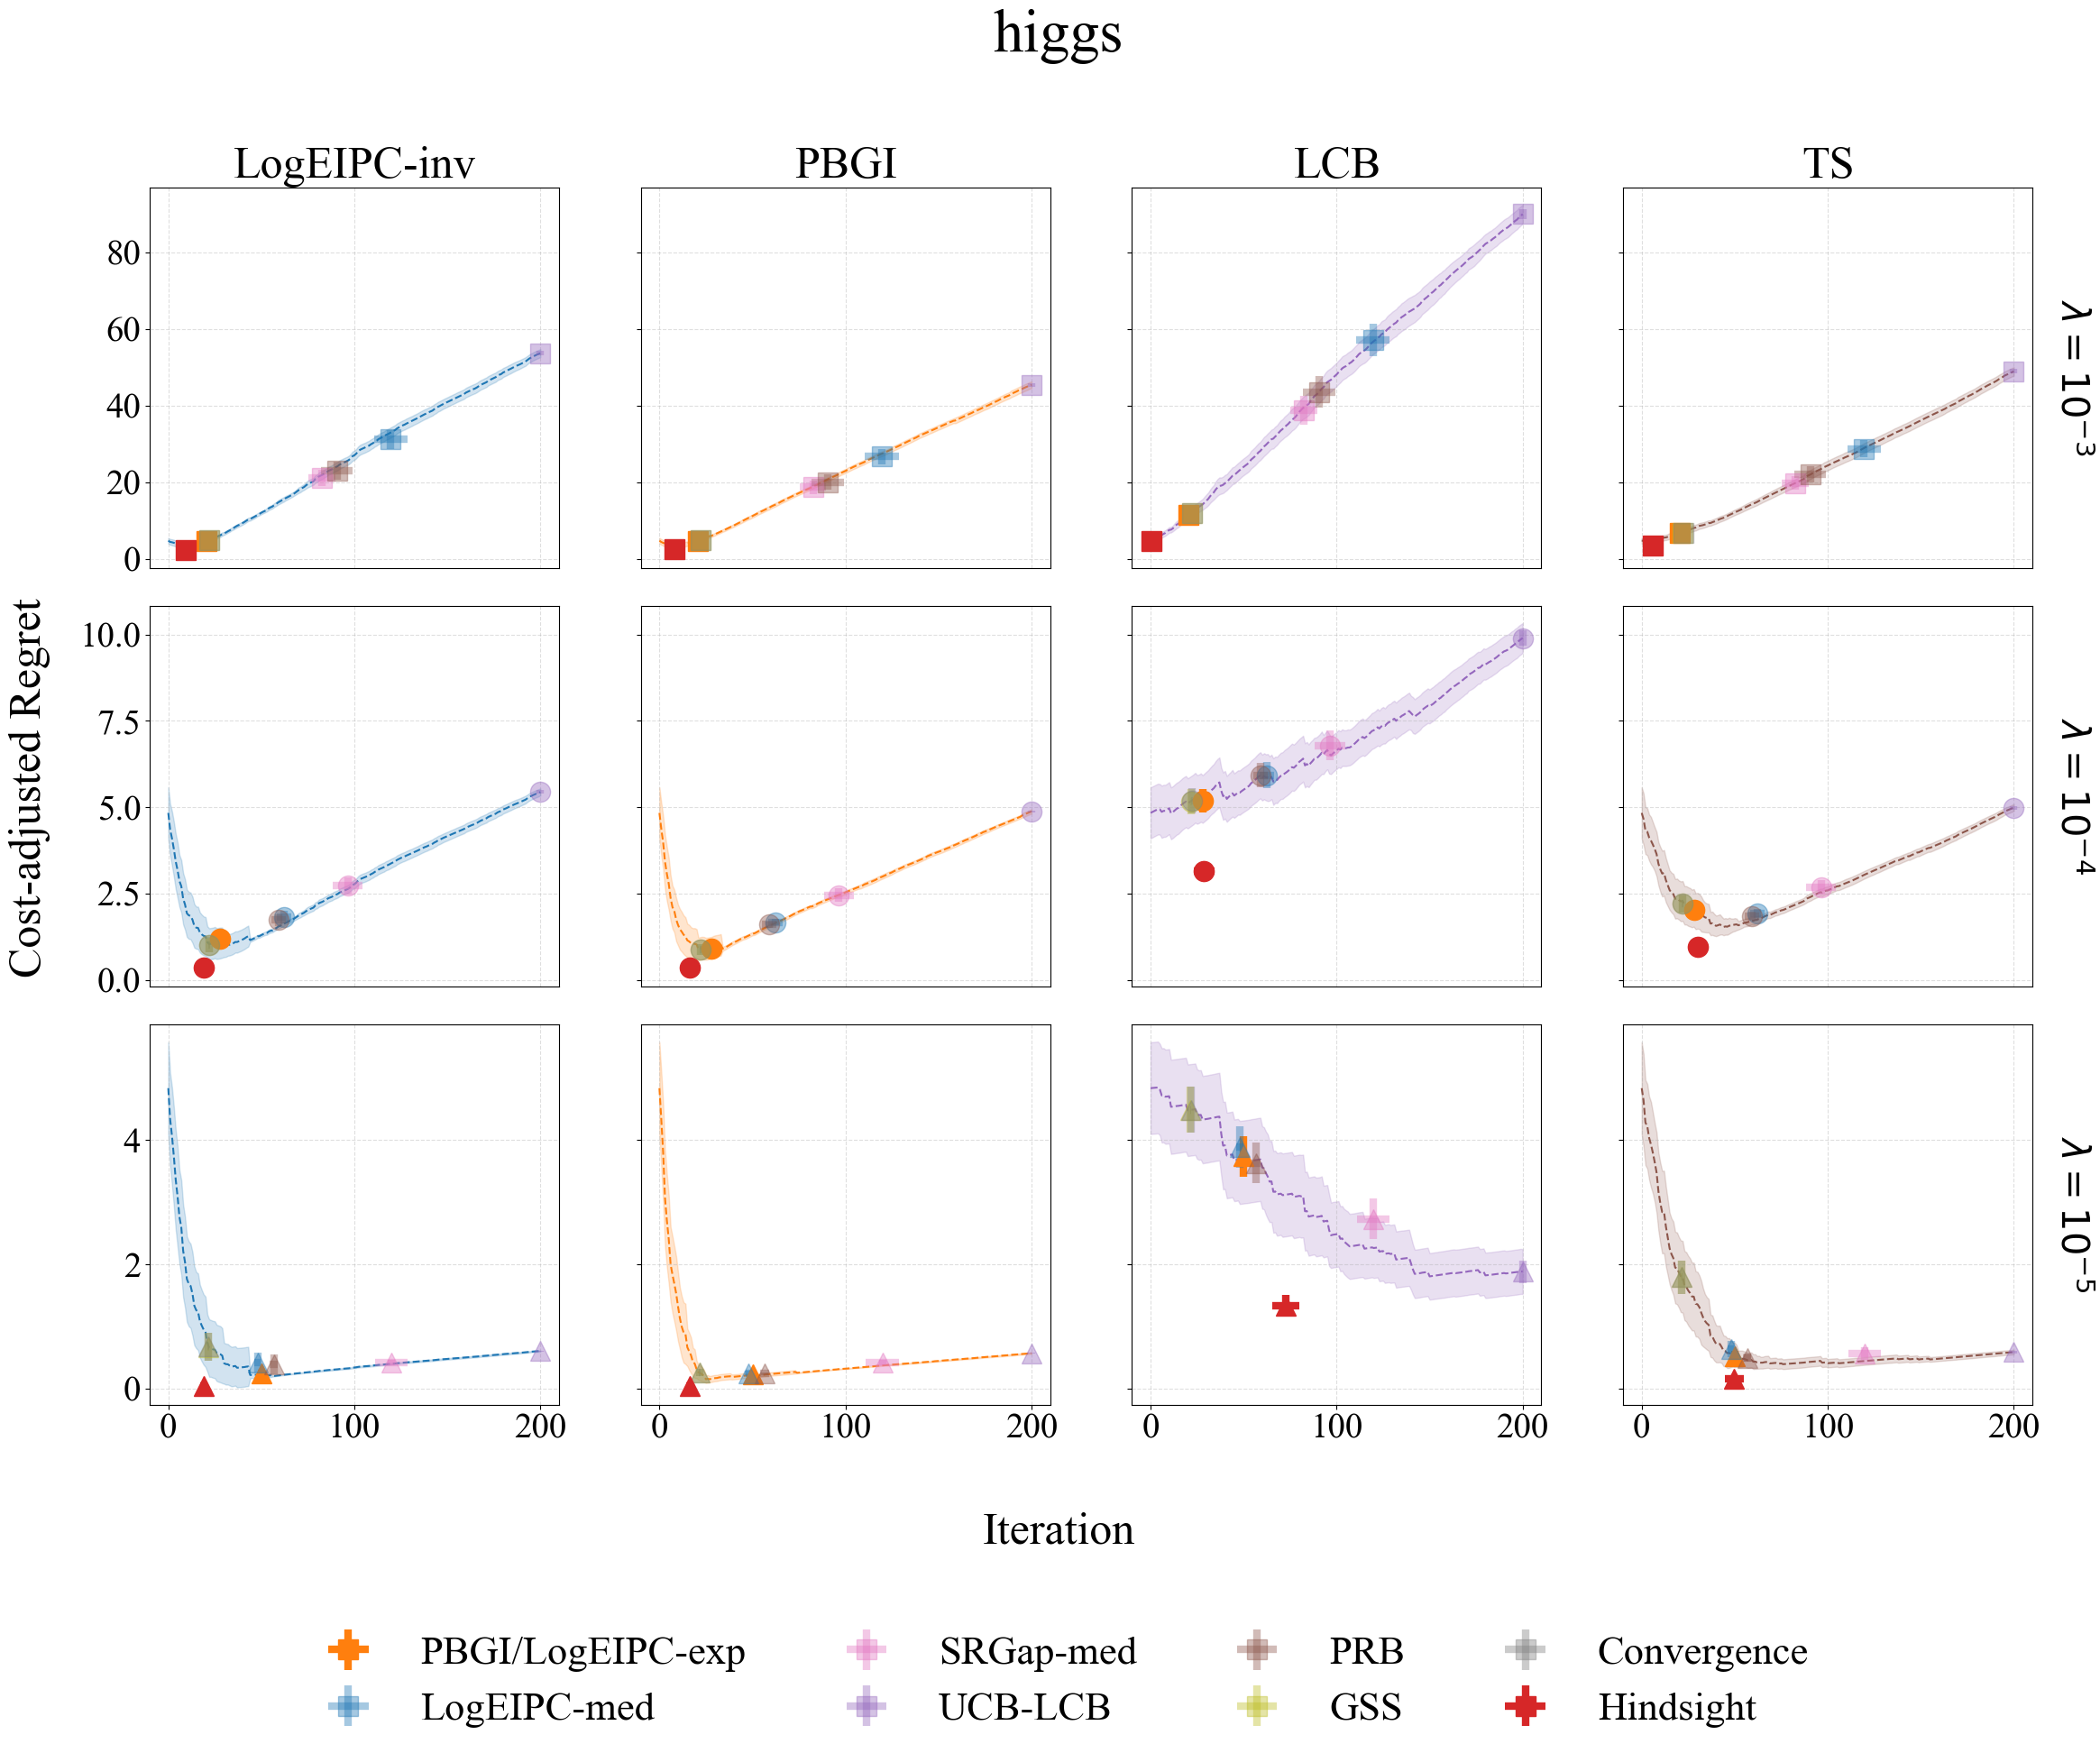

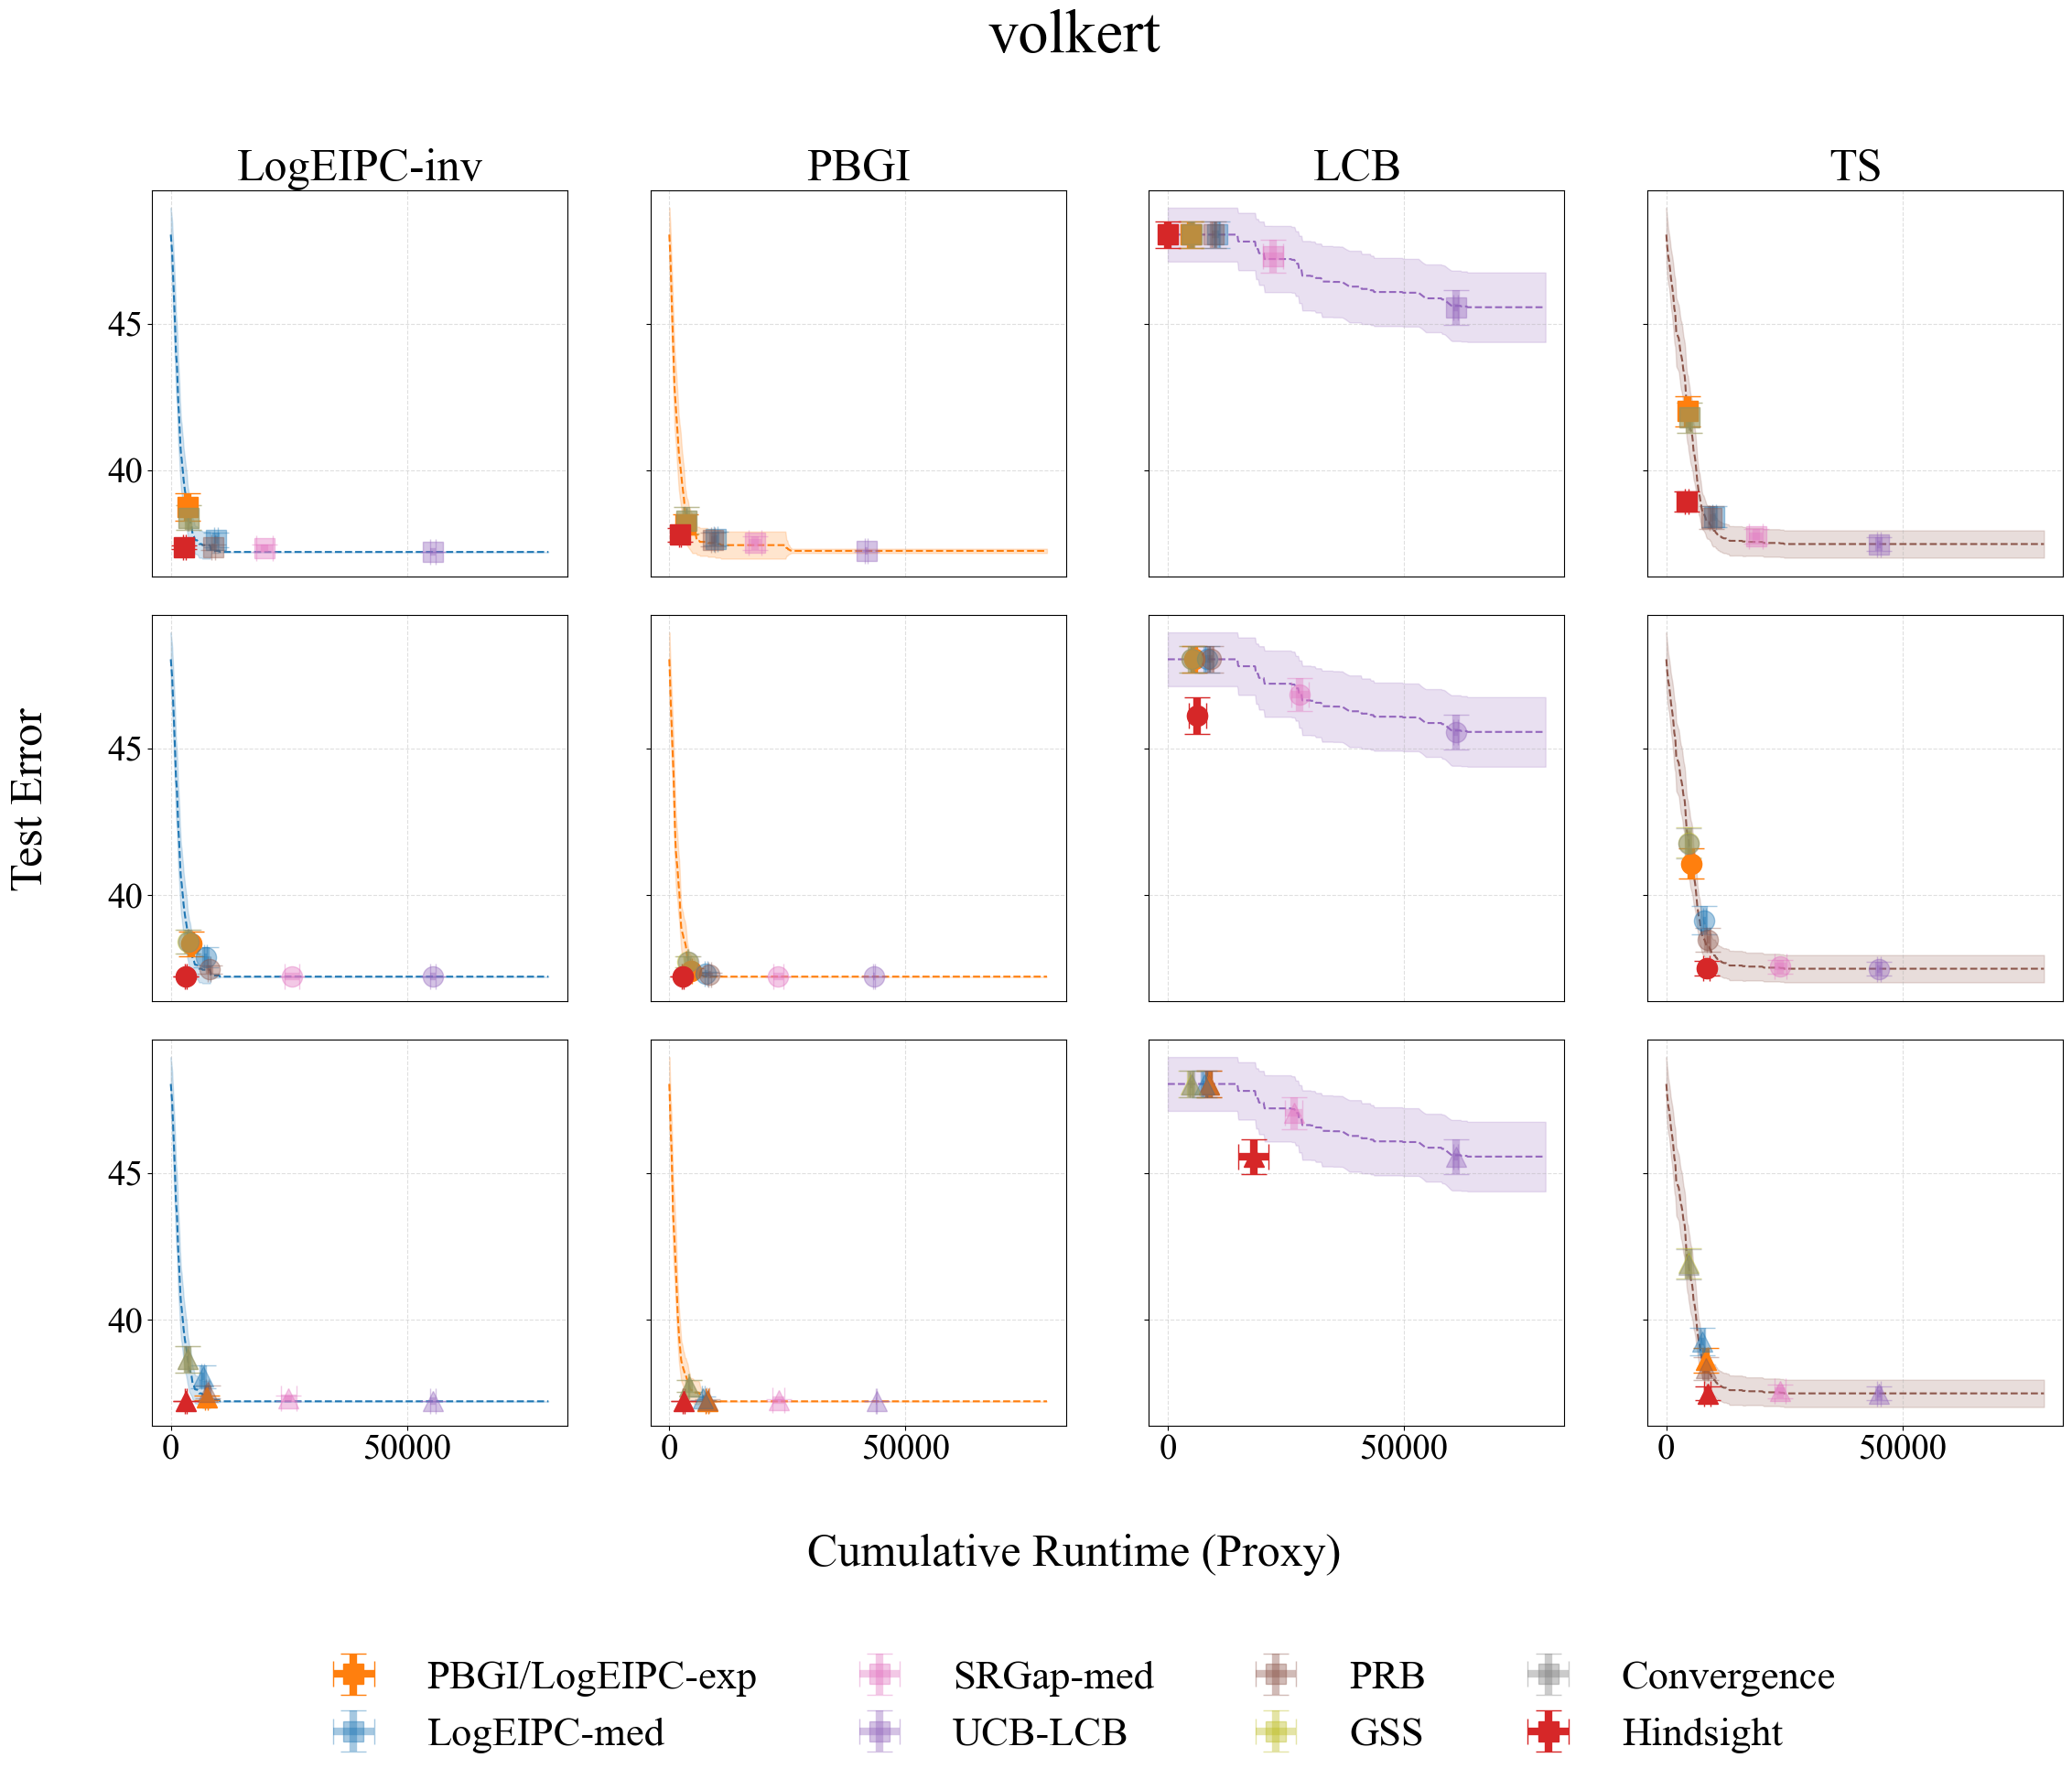

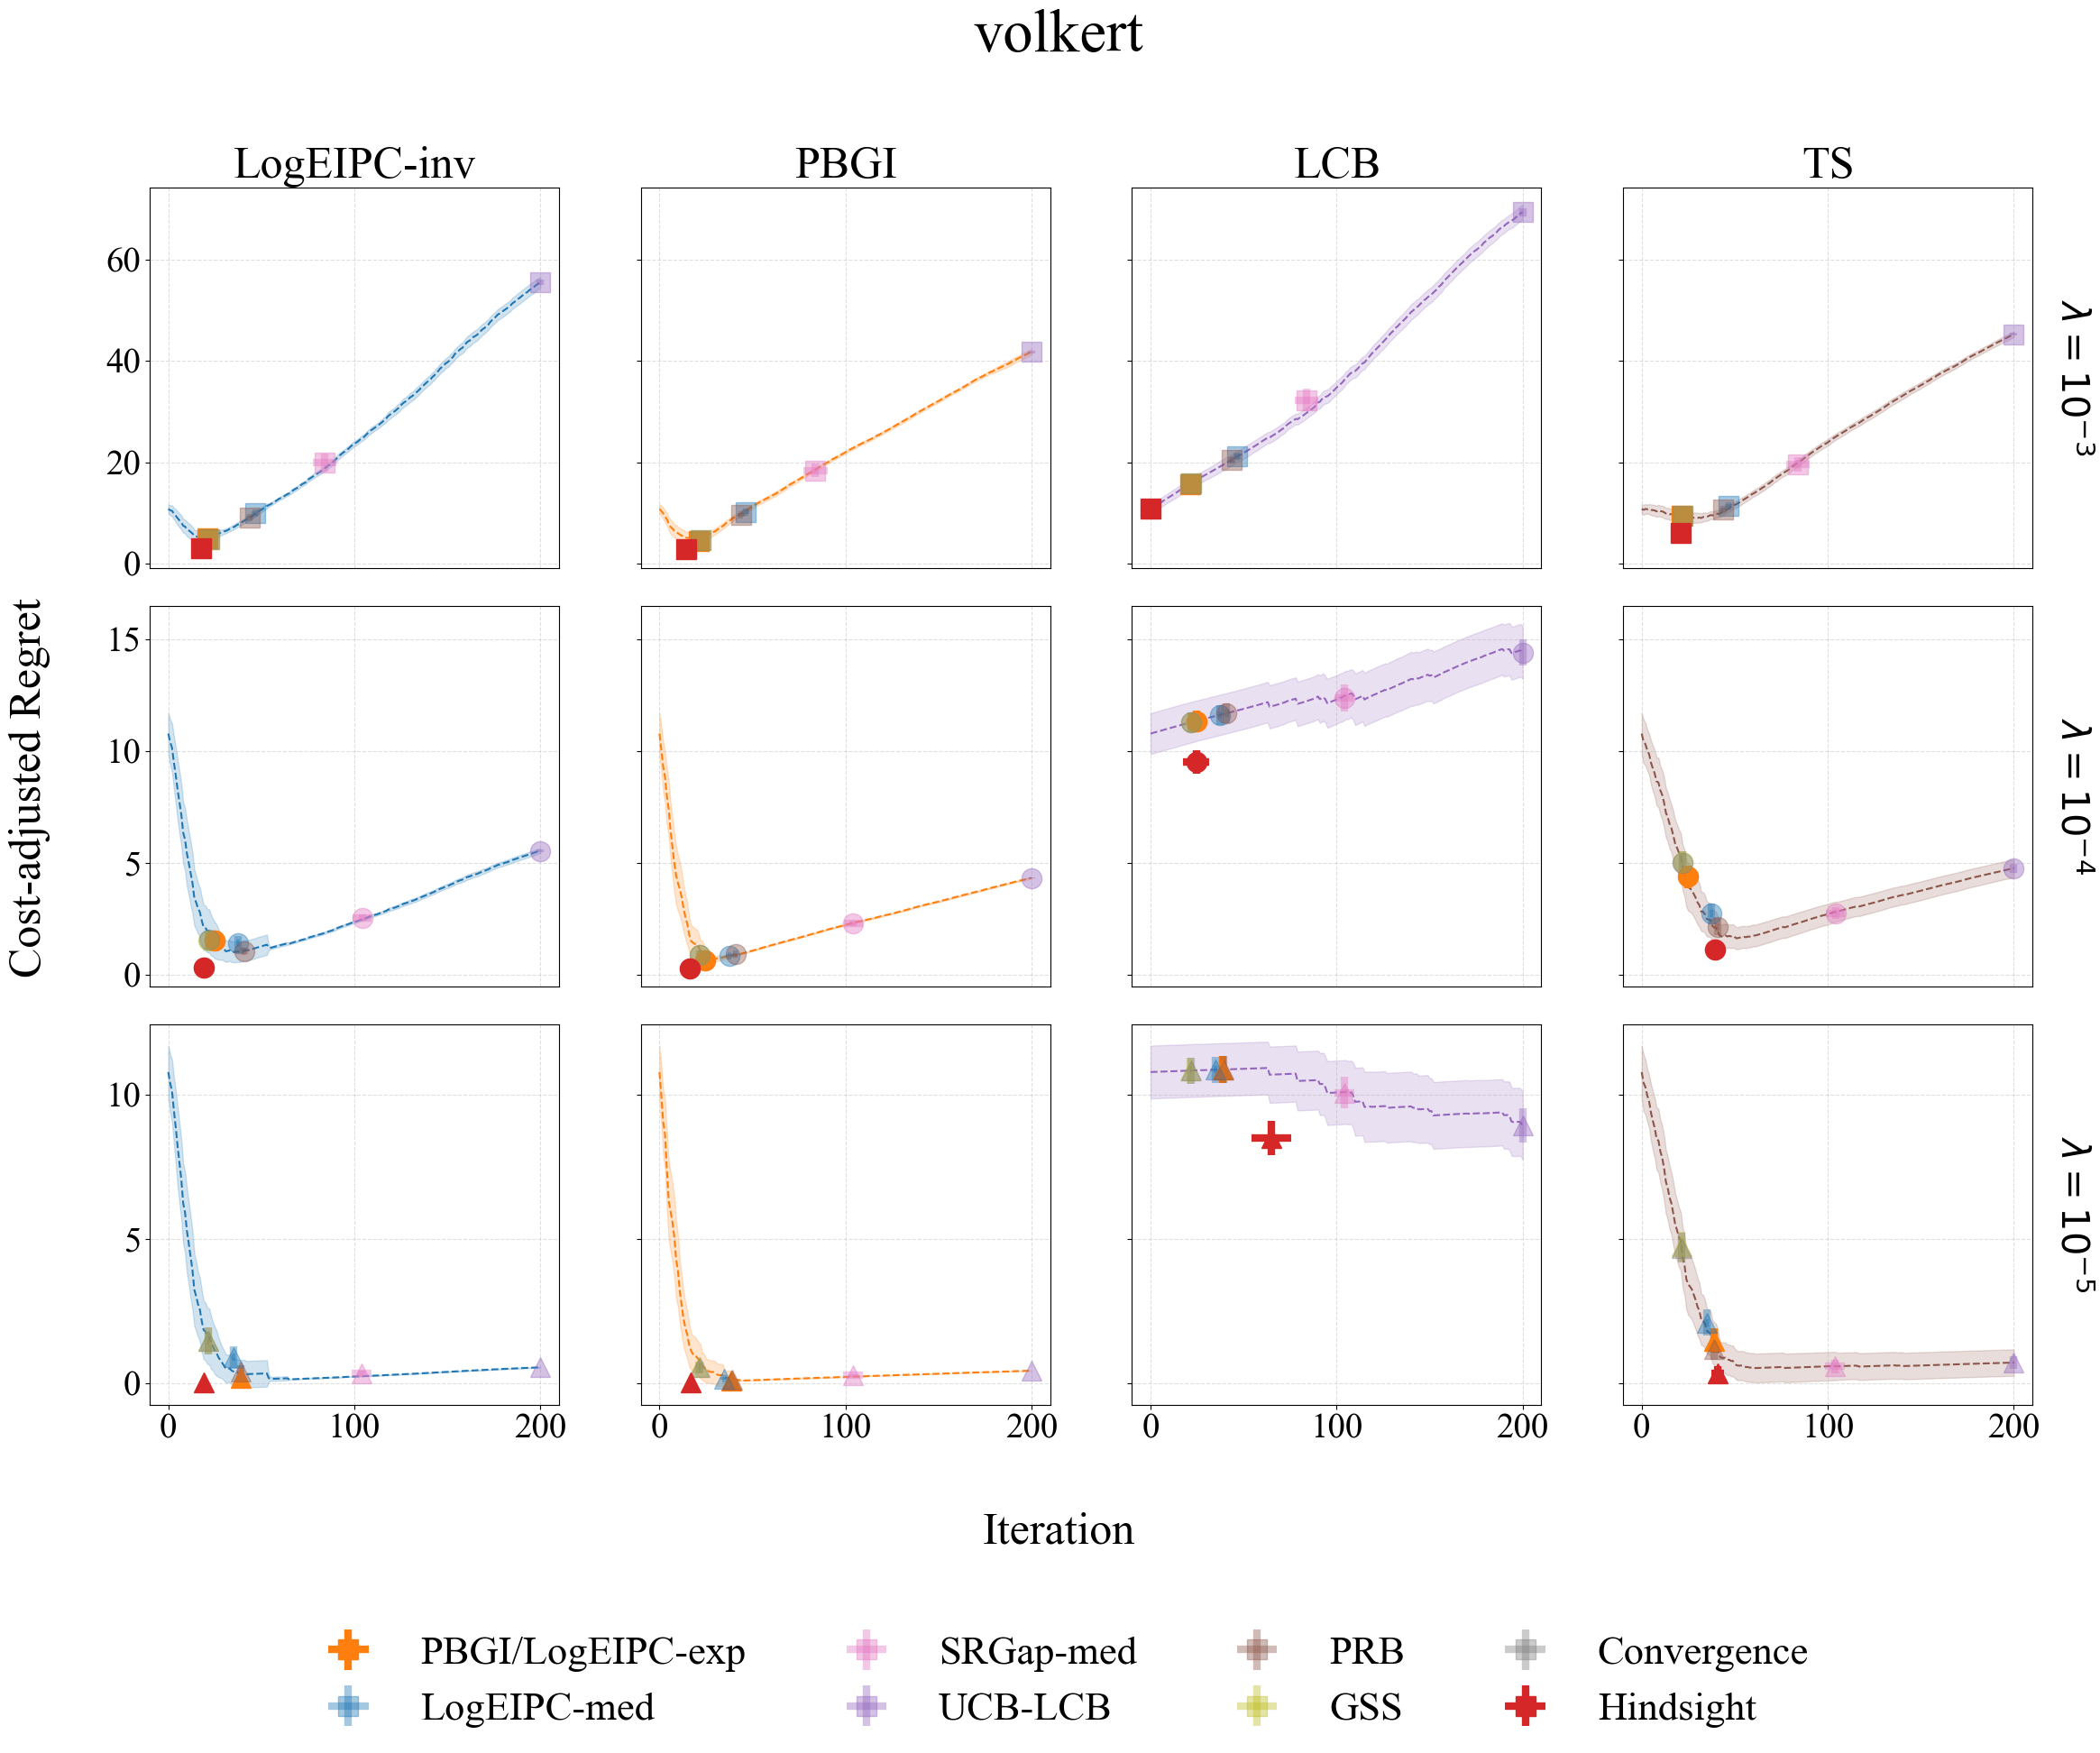

In [ ]:
# === Plotting ===
for d in dataset_names:
    best_acc   = best_acc_per_dataset[d]
    best_error = 100. - best_acc

    # === 1) Test error vs estimated cumulative cost ===
    fig, axes = plt.subplots(3, 4, figsize=(24, 18), sharey="row")
    fig.suptitle(f"{d}", fontsize=48)
    for i, lam in enumerate(lambdas):
        lam_str = f"1e-{int(round(-np.log10(lam)))}"

        for j in range(4):
            acq = acq_order[j]
            fixed_acq = f"PBGI({lam_str})" if acq == 'PBGI' else acq
            ax = axes[i, j]

            # === Mean test error curve ===
            cost_grid = np.linspace(0, cost_limit_per_dataset[d], 801)
            curves = []
            for seed in range(len(metrics_per_acq[d][fixed_acq]["cumulative cost"])):
                c = np.array(metrics_per_acq[d][fixed_acq]["cumulative cost"][seed])
                e = np.array(metrics_per_acq[d][fixed_acq]["final test error"][seed])
                idx = np.argsort(c)
                curves.append(np.interp(cost_grid, c[idx], e[idx]))
            curves = np.vstack(curves)
            mean_c = curves.mean(axis=0)
            sem_c  = curves.std(axis=0) / np.sqrt(curves.shape[0])

            ax.plot(cost_grid, mean_c, linestyle='--', color=color_dict[fixed_acq])
            ax.fill_between(cost_grid, mean_c - 2 * sem_c, mean_c + 2 * sem_c, color=color_dict[fixed_acq], alpha=0.2)

            # === Stopping rule overlays ===
            for rule in stopping_rules:
                # Only use rules from the correct lambda
                if rule['acq_key'] != f"PBGI({lam_str})":
                    continue

                stop_vals = []
                stop_costs = []
                for seed in range(curves.shape[0]):
                    errs = metrics_per_acq[d][fixed_acq]["final test error"][seed]
                    costs = metrics_per_acq[d][fixed_acq]["cumulative cost"][seed]
                    if rule['is_hindsight']:
                        regs = np.array(errs) - best_error + lam * np.array(costs)
                        idx = np.argmin(regs)
                    else:
                        idx = next((k for k in range(init, len(errs)) if rule['condition_fn'](k, seed, d)), len(errs) - 1)
                    stop_vals.append(errs[idx])
                    stop_costs.append(costs[idx])

                mx = np.mean(stop_costs)
                my = np.mean(stop_vals)
                sx = np.std(stop_costs) / np.sqrt(len(stop_costs))
                sy = np.std(stop_vals) / np.sqrt(len(stop_vals))

                alpha = 1.0 if (rule['stp_key'] == 'PBGI' or rule['stp_key'] == 'Hindsight') else 0.4
                ax.errorbar(mx, my, xerr=sx, yerr=sy,
                            fmt=rule['marker'],
                            markersize=16,
                            linewidth=6,
                            color=rule['color'],
                            capsize=10,
                            alpha=alpha,
                            label=rule['label'])

            if i == 0:
                ax.set_title(acq, fontsize=36)  # only first row
            ax.tick_params(axis='both', which='major', labelsize=28)
            if i != 2:
                ax.set_xticklabels([])
                ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
            ax.grid(True, linestyle='--', alpha=0.4)

    fig.subplots_adjust(left=0.08, right=0.95, bottom=0.12, top=0.87, hspace=0.1)

    fig.text(0.5, 0.035, 'Cumulative Runtime (Proxy)', ha='center', fontsize=36)
    fig.text(0.015, 0.5, 'Test Error', va='center', rotation='vertical', fontsize=36)

    # Two-row legend
    from math import ceil
    handles, labels = axes[0, 0].get_legend_handles_labels()
    half = ceil(len(handles) / 2)
    fig.legend(
        handles, labels,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.0),
        ncol=half,
        fontsize=32,
        frameon=False
    )

    # === 2) Regret + λ·cost vs iteration ===
    fig, axes = plt.subplots(3, 4, figsize=(24, 18), sharey='row')
    fig.suptitle(f"{d}", fontsize=48)
    for i, lam in enumerate(lambdas):
        lam_str = f"1e-{int(round(-np.log10(lam)))}"

        for j in range(4):
            acq = acq_order[j]
            fixed_acq = f"PBGI({lam_str})" if acq == 'PBGI' else acq
            ax = axes[i, j]

            regs_all = []
            for seed in range(len(metrics_per_acq[d][fixed_acq]["cumulative cost"])):
                errs = np.array(metrics_per_acq[d][fixed_acq]["final test error"][seed])
                costs = np.array(metrics_per_acq[d][fixed_acq]["cumulative cost"][seed])
                regs_all.append((errs - best_error) + lam * costs)
            regs_all = np.vstack(regs_all)
            mean_r = regs_all.mean(axis=0)
            sem_r  = regs_all.std(axis=0) / np.sqrt(regs_all.shape[0])
            iters  = np.arange(mean_r.shape[0])

            ax.plot(iters, mean_r, linestyle='--', color=color_dict[fixed_acq])
            ax.fill_between(iters, mean_r - 2 * sem_r, mean_r + 2 * sem_r, color=color_dict[fixed_acq], alpha=0.2)

            # === Stopping rule overlays ===
            for rule in stopping_rules:
                # Only use rules from the correct lambda
                if rule['acq_key'] != f"PBGI({lam_str})":
                    continue

                stop_vals = []
                stop_iters = []
                for seed in range(regs_all.shape[0]):
                    seq = regs_all[seed]
                    if rule['is_hindsight']:
                        idx = np.argmin(seq)
                    else:
                        idx = next((k for k in range(init, len(seq)) if rule['condition_fn'](k, seed, d)), len(seq) - 1)
                    stop_vals.append(seq[idx])
                    stop_iters.append(idx)

                mx = np.mean(stop_iters)
                my = np.mean(stop_vals)
                sx = np.std(stop_iters) / np.sqrt(len(stop_iters))
                sy = np.std(stop_vals) / np.sqrt(len(stop_vals))

                alpha = 1.0 if (rule['stp_key'] == 'PBGI' or rule['stp_key'] == 'Hindsight') else 0.4
                ax.errorbar(mx, my, xerr=sx, yerr=sy,
                            fmt=rule['marker'],
                            markersize=16,
                            linewidth=6,
                            color=rule['color'],
                            capsize=0,
                            alpha=alpha,
                            label=rule['label'])

            if i == 0:
                ax.set_title(acq, fontsize=36)
            ax.tick_params(axis='both', which='major', labelsize=28)
            if i != 2:
                ax.set_xticklabels([])
                ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
            ax.grid(True, linestyle='--', alpha=0.4)

    # Rotated lambda labels on the right
    lambda_labels = [r'$\lambda=10^{-3}$', r'$\lambda=10^{-4}$', r'$\lambda=10^{-5}$']
    for i, label in enumerate(lambda_labels):
        ax = axes[i, -1]
        ax.text(1.05, 0.5, label, transform=ax.transAxes, va='center', ha='left', fontsize=30, rotation=270)
    
    fig.subplots_adjust(left=0.08, right=0.95, bottom=0.12, top=0.87, hspace=0.1)

    fig.text(0.5, 0.035, 'Iteration', ha='center', fontsize=36)
    fig.text(0.015, 0.5, 'Cost-adjusted Regret', va='center', rotation='vertical', fontsize=36)

    # Two-row legend
    from math import ceil
    handles, labels = axes[0, 0].get_legend_handles_labels()
    half = ceil(len(handles) / 2)
    fig.legend(
        handles, labels,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.0),
        ncol=half,
        fontsize=32
    )

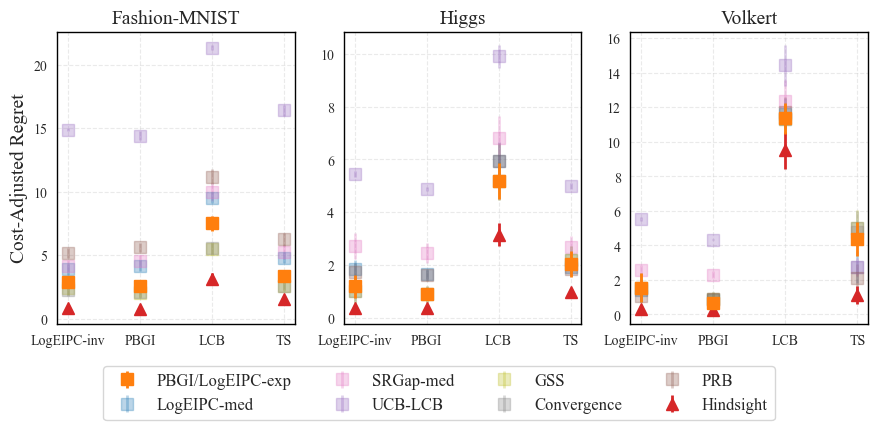

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

# Set style
sns.set_style('whitegrid', {
    'grid.linestyle': '--',
    'grid.alpha': 0.4
})

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'legend.fontsize': 14,
    # 'xtick.rotation': 45,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.autolayout': False,  # we’ll call tight_layout() explicitly
})


def style_spines(ax, color='black', linewidth=1):
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor(color)
        spine.set_linewidth(linewidth)

# Config
dataset_names = ['Fashion-MNIST', 'higgs', 'volkert']
lam = 1e-4
lam_str = '1e-4'
acq_order = ['LogEIPC-inv', 'PBGI', 'LCB', 'TS']
init = 20
n_cols = len(acq_order)

# Set up plot
fig, axes = plt.subplots(1, len(dataset_names), figsize=(3 * len(dataset_names), 4 * 1), sharey=False)

for col, d in enumerate(dataset_names):
    ax = axes[col]
    best_acc = best_acc_per_dataset[d]
    best_error = 100. - best_acc

    for j, acq in enumerate(acq_order):
        fixed_acq = f"PBGI({lam_str})" if acq == 'PBGI' else acq

        for rule in stopping_rules:
            if rule['acq_key'] != f"PBGI({lam_str})":
                continue

            stop_vals = []
            stop_iters = []
            for seed in range(len(metrics_per_acq[d][fixed_acq]["cumulative cost"])):
                errs = metrics_per_acq[d][fixed_acq]["final test error"][seed]
                costs = metrics_per_acq[d][fixed_acq]["cumulative cost"][seed]
                if rule['is_hindsight']:
                    regs = np.array(errs) - best_error + lam * np.array(costs)
                    idx = np.argmin(regs)
                else:
                    idx = next((k for k in range(init, len(errs)) if rule['condition_fn'](k, seed, d)), len(errs) - 1)
                stop_vals.append((errs[idx] - best_error) + lam * costs[idx])

            mean_val = np.mean(stop_vals)
            err_val = np.std(stop_vals) / np.sqrt(len(stop_vals))

            alpha = 1.0 if (rule['stp_key'] == 'PBGI' or rule['is_hindsight']) else 0.3
            zorder = 3 if rule['stp_key'] == 'PBGI' else 2
            marker = "^" if rule['is_hindsight'] else 's'
            ax.errorbar(j, mean_val, yerr=2 * err_val,
                        fmt=marker,
                        markersize=8,
                        linewidth=2,
                        color=rule['color'],
                        capsize=0,
                        alpha=alpha,
                        zorder=zorder,
                        label=rule['label'])

    ax.set_xticks(range(n_cols))
    ax.set_xticklabels(acq_order)
    if (d == "Fashion-MNIST"):
        ax.set_title(d)
    else:
        ax.set_title(d.capitalize())
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_ylabel("Cost-Adjusted Regret" if col == 0 else "")
    style_spines(ax)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
legend_hls = dict(zip(labels, handles))

fig.legend(legend_hls.values(), legend_hls.keys(),
           loc='lower center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=ceil(len(legend_hls) / 2),
           fontsize=12)

plt.tight_layout(rect=[0, 0.0, 1, 0.95])
plt.savefig(f'../plots/BarPlot_empirical_unknown_cost.pdf', bbox_inches='tight')
plt.show()